<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## HDT3 - House Prices
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*train.csv*. A continuación se muestran los resultados: 

*Primero se importan todas la librerías requeridas para llevar a cabo el análisis*

In [133]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn as sklearn
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

Se lleva a cabo un análisis identificando los tipos de variables involucradas:
## Descripcion de variables
- MSSubClass: Cuantitativa Discreta
- MSZoning: Cualitativa Categorica	
- LotFrontage: Cuantitativa Medible
- LotArea: Cuantitativa Medible
- Street: Cualitativa Categorica
- Alley: Cualitativa Categorica
- LotShape: Cualitativa Categorica       
- LandContour: Cualitativa Categorica
- Utilities: Cualitativa Categorica		
- LotConfig: Cualitativa Categorica
- LandSlope: Cualitativa Categorica 
- Neighborhood: Cualitativa Categorica
- Condition1: Cualitativa Categorica
- Condition2: Cualitativa Categorica
- BldgType: Cualitativa Categorica
- HouseStyle: Cualitativa Categorica 
- OverallQual: Cuantitativa Discreta
- OverallCond: Cuantitativa Discreta
- YearBuilt: Cuantitativa Discreta
- YearRemodAdd: Cuantitativa Discreta
- RoofStyle: Cualitativa Categorica
- RoofMatl: Cualitativa Categorica
- Exterior1st: Cualitativa Categorica
- Exterior2nd: Cualitativa Categorica
- MasVnrType: Cualitativa Categorica
- MasVnrArea: Cuantitativa Continua
- ExterQual: Cualitativa Categorica 
- ExterCond: Cualitativa Categorica
- Foundation: Cualitativa Categorica
- BsmtQual: Cualitativa Ordinal
- BsmtCond: Cualitativa Categorica
- BsmtExposure: Cualitativa Categorica 
- BsmtFinType1: Cualitativa Categorica
- BsmtFinSF1: Cuantitativa Continua
- BsmtFinType2: Cualitativa Categorica
- BsmtFinSF2: Cuantitativa Continua
- BsmtUnfSF: Cuantitativa Continua
- TotalBsmtSF: Cuantitativa Continua
- Heating: Cualitativa Categorica
- HeatingQC: Cualitativa Categoriica
- CentralAir: Cualitativa Categorica
- Electrical: Cualitativa Categorica
- 1stFlrSF: Cuantitativa Continua
- 2ndFlrSF: Cuantitativa Continua
- LowQualFinSF: Cuantitativa Continua
- GrLivArea: Cuantitativa Continua
- BsmtFullBath: Cuantitativa Discreta
- BsmtHalfBath: Cuantitativa Discreta
- FullBath: Cuantitativa Discreta
- HalfBath: Cuantitativa Discreta
- Bedroom: Cuantitativa Discreta
- Kitchen: Kitchens above grade
- KitchenQual: Cualitativa Categorica
- TotRmsAbvGrd: Cuantitativa Discreta
- Functional: Cualitativa Categorica
- Fireplaces: Cuantitativa Discreta
- FireplaceQu: Cualitativa Categorica
- GarageType: Cualitativa Categorica		
- GarageYrBlt: Cuantitativa Discreta
- GarageFinish: Cualitativa Categorica
- GarageCars: Cuantitativa Discreta
- GarageArea: Cuantitativa Continua
- GarageQual: Cualitativa Categorica
- GarageCond: Cualitativa Categorica 
- PavedDrive: Cualitativa Categorica
- WoodDeckSF: Cuantitativa Continua
- OpenPorchSF: Cuantitativa Continua
- EnclosedPorch: Cuantitativa Continua
- 3SsnPorch: TCuantitativa Continua
- ScreenPorch: Cuantitativa Continua
- PoolArea: Cuantitativa Continua
- PoolQC: Cualitativa Categorica
- Fence: Cualitativa Categorica
- MiscFeature: Cualitativa Categorica
- MiscVal: Cuantitativa Discreta
- MoSold: Cuantitativa Discreta
- YrSold: Cuantitativa Discreta
- SaleType: Cualitativa Categorica
- SaleCondition: Cualitativa Categorica

*Antes de llevar a cabo el análisis se realiza una carga de los datos y se realizá una serie de preprocesamientos para que la información sea útil para el análisis como llenar con 0s o realizar las conversiones debidas a elementos tipo *NaN***

In [134]:
dataframe: pd.DataFrame = pd.read_csv("train.csv",  encoding='ISO-8859-1')

dataframe.columns
dataframe['PoolQC'] = dataframe['PoolQC'].fillna(0) # Se rellenan con 0 los na de PoolQC
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None') # Se rellenan con 'None' los na 'MasVnrType'
dataframe['FireplaceQu'] = dataframe['MasVnrType'].fillna('NA')
dataframe['Fence'] = dataframe['Fence'].fillna('NA')
dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('NA')
dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(0)
dataframe['Alley'] = dataframe['Alley'].fillna('NA')
#dataframe['GarageYrBlt'] = dataframe['GarageYrBlt'].fillna(dataframe['GarageYrBlt'].mean())
#dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(dataframe['MasVnrArea'].mean())

dataframe.drop(['Id'], axis=1, inplace=True) #Se elimina la columna Id

infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

#Extraccion de las columnas a utilizar para las pruebas de clustering y regresion lineal
df = dataframe
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave    NA      Reg   
1             20       RL         80.0     9600   Pave    NA      Reg   
2             60       RL         68.0    11250   Pave    NA      IR1   
3             70       RL         60.0     9550   Pave    NA      IR1   
4             60       RL         84.0    14260   Pave    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave    NA      Reg   
1456          20       RL         85.0    13175   Pave    NA      Reg   
1457          70       RL         66.0     9042   Pave    NA      Reg   
1458          20       RL         68.0     9717   Pave    NA      Reg   
1459          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0      0     NA          NA   
1            Lvl    AllPub       FR2  ...        0      0     NA          NA   
2            Lvl    AllPub    Inside  ...        0      0     NA          NA   
3            Lvl    AllPub    Corner  ...        0      0     NA          NA   
4            Lvl    AllPub       FR2  ...        0      0     NA          NA   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0      0     NA          NA   
1456         Lvl    AllPub    Inside  ...        0      0  MnPrv          NA   
1457         Lvl    AllPub    Inside  ...        0      0  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0      0     NA          NA   
1459         Lvl    AllPub    Inside  ...        0      0     NA          NA   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

Dentro del preprocesamiento de datos se convirtieron algunas variables cualitativas a su versión cuantitativas que se consideraron que pueden ser útiles para el análisis exploratorio, el clustering y la predicción de valores mediante regresiones lineales.  

In [135]:
def change(variable):
    dictValue = {'NA': 0}
    count = 1

    def changeToVariable(x):
        nonlocal count  # Para indicar que count es una variable no local
        if x in dictValue:
            return dictValue[x]
        else:
            dictValue[x] = count
            count += 1
            return dictValue[x]
        
    if not pd.api.types.is_numeric_dtype(dataframe[variable]):
        df[variable] = dataframe[variable].apply(changeToVariable)
    
        print(f'Para la variable {variable} los valores ahora son: ')
        for key, value in dictValue.items():
            print(key, ":", value)
    else:
        print(f"La columna {variable} es numerica")

variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'
]

for variable in variables:
    change(variable=variable)

La columna MSSubClass es numerica
Para la variable MSZoning los valores ahora son: 
NA : 0
RL : 1
RM : 2
C (all) : 3
FV : 4
RH : 5
Para la variable Street los valores ahora son: 
NA : 0
Pave : 1
Grvl : 2
Para la variable Alley los valores ahora son: 
NA : 0
Grvl : 1
Pave : 2
Para la variable LotShape los valores ahora son: 
NA : 0
Reg : 1
IR1 : 2
IR2 : 3
IR3 : 4
Para la variable LandContour los valores ahora son: 
NA : 0
Lvl : 1
Bnk : 2
Low : 3
HLS : 4
Para la variable Utilities los valores ahora son: 
NA : 0
AllPub : 1
NoSeWa : 2
Para la variable LotConfig los valores ahora son: 
NA : 0
Inside : 1
FR2 : 2
Corner : 3
CulDSac : 4
FR3 : 5
Para la variable LandSlope los valores ahora son: 
NA : 0
Gtl : 1
Mod : 2
Sev : 3
Para la variable Neighborhood los valores ahora son: 
NA : 0
CollgCr : 1
Veenker : 2
Crawfor : 3
NoRidge : 4
Mitchel : 5
Somerst : 6
NWAmes : 7
OldTown : 8
BrkSide : 9
Sawyer : 10
NridgHt : 11
NAmes : 12
SawyerW : 13
IDOTRR : 14
MeadowV : 15
Edwards : 16
Timber : 17
Gilber

In [136]:
print('Se determina que el tamaño del dataframe con el que se está trabajando es de',len(dataframe),'datos (filas) incluyendo los encabezados de la tabla.')

Se determina que el tamaño del dataframe con el que se está trabajando es de 1460 datos (filas) incluyendo los encabezados de la tabla.


En este estudio, se decidió como convención realizar transformaciones de datos únicamente a aquellas columnas que cuentan con una cantidad de valores *NaN* mayor a 50 y son cuantitativas. Con este margen, únicamente dos columnas no fueron transformadas:

In [137]:
# Extrae la información relevante del resumen
info_data = {'Columna': [], 'Non-Null Count': [], 'Dtype': []}

for col in dataframe.columns:
    info_data['Columna'].append(col)
    info_data['Non-Null Count'].append(dataframe[col].count())
    info_data['Dtype'].append(dataframe[col].dtype)

# Crea un nuevo DataFrame a partir de la información extraída
info_df = pd.DataFrame(info_data)

info_df[info_df['Non-Null Count']<1460]


Columna  Non-Null Count    Dtype
25    MasVnrArea            1452  float64
30      BsmtCond            1423   object
34  BsmtFinType2            1422   object
58   GarageYrBlt            1379  float64

Se retiran las filas que contengan *NaN* en la columna de respuesta **SalePrice** debido a que es la variable principal que se está estudiando.

In [138]:
dataframe['SalePrice'] =dataframe['SalePrice'].dropna()
dataframe['SalePrice']


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Posteriormente, se procedió a realizar un análisis estadístico de normalidad y comparación de distribuciones para las columnas númericas en el dataframe preprocesado, aplicando pruebas de Shapiro-Wilk y Anderson-Darling. A manera de contar con un análisis detallado de los procedimientos realizados, se imprimen todos los cálculos y se muestran en gráficas. Son una extensa cantidad de datos, por lo que leugo de estos resultados y gráficas, se muestran los resultados relevantes.

Columna MSSubClass: Estadística=0.8046, p-valor=0.0000
La columna MSSubClass no sigue una distribución normal.
Columna MSZoning: Estadística=0.4803, p-valor=0.0000
La columna MSZoning no sigue una distribución normal.
Columna LotFrontage: Estadística=0.9006, p-valor=0.0000
La columna LotFrontage no sigue una distribución normal.
Columna LotArea: Estadística=0.3511, p-valor=0.0000
La columna LotArea no sigue una distribución normal.
Columna Street: Estadística=0.0362, p-valor=0.0000
La columna Street no sigue una distribución normal.
Columna Alley: Estadística=0.2529, p-valor=0.0000
La columna Alley no sigue una distribución normal.
Columna LotShape: Estadística=0.6593, p-valor=0.0000
La columna LotShape no sigue una distribución normal.
Columna LandContour: Estadística=0.3348, p-valor=0.0000
La columna LandContour no sigue una distribución normal.
Columna Utilities: Estadística=0.0087, p-valor=0.0000
La columna Utilities no sigue una distribución normal.
Columna LotConfig: Estadística=

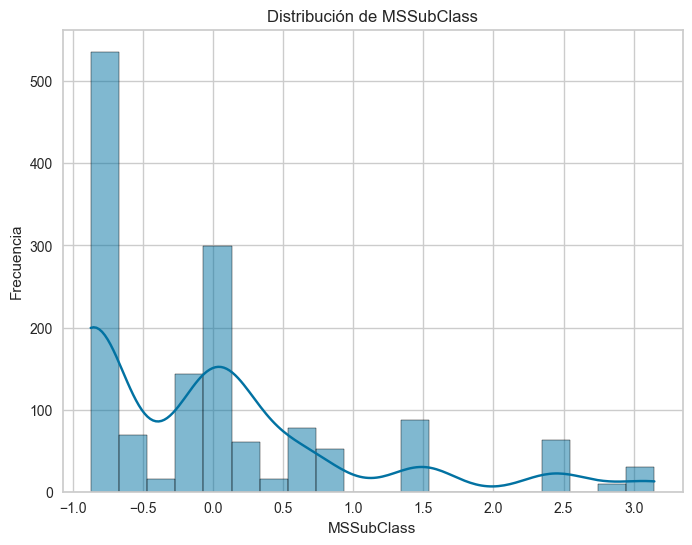

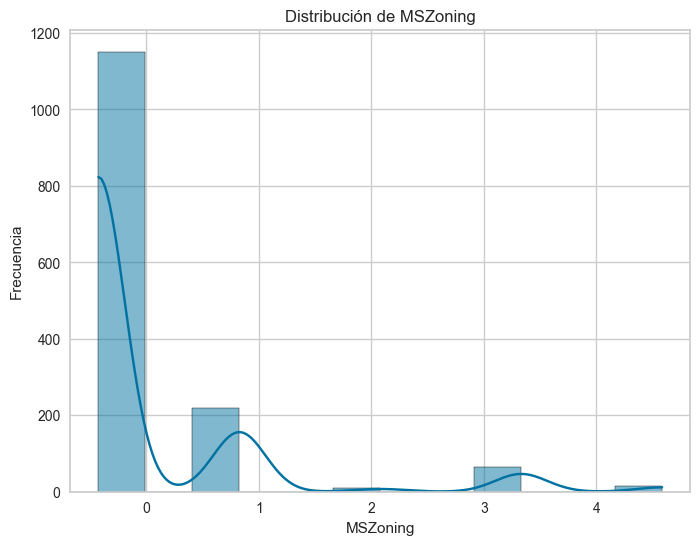

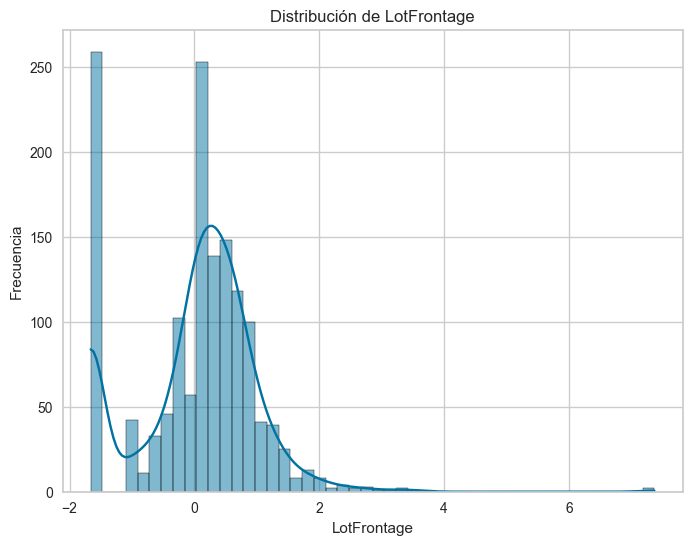

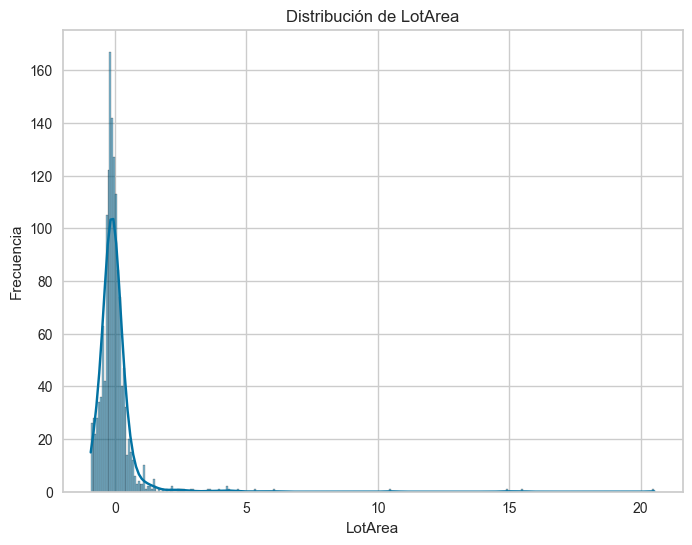

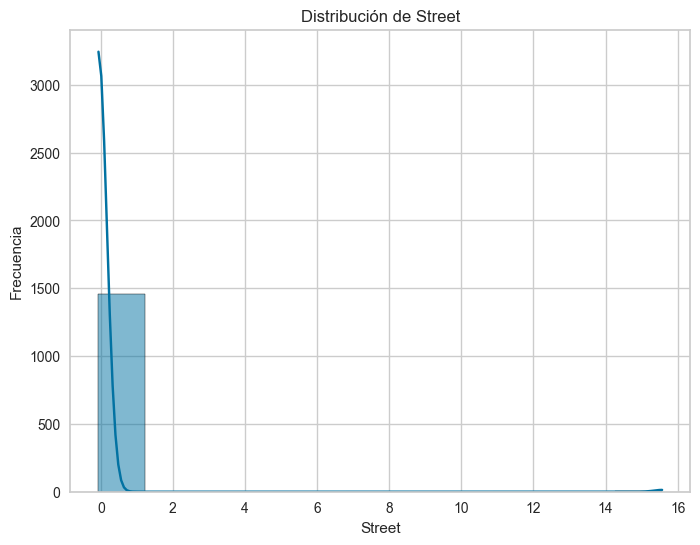

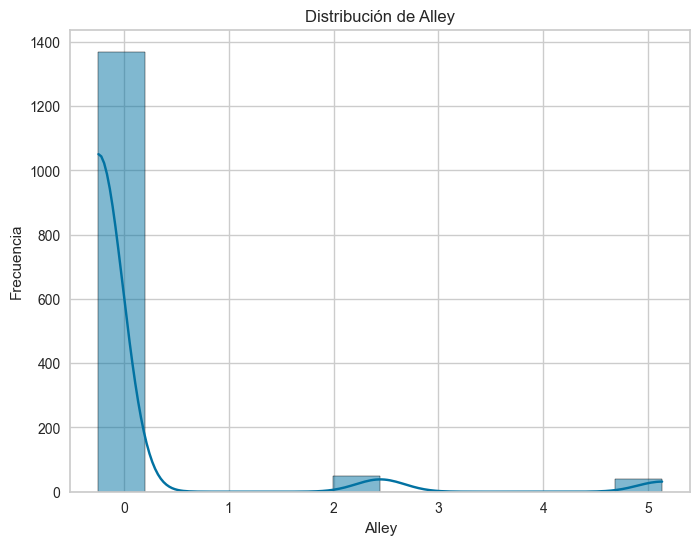

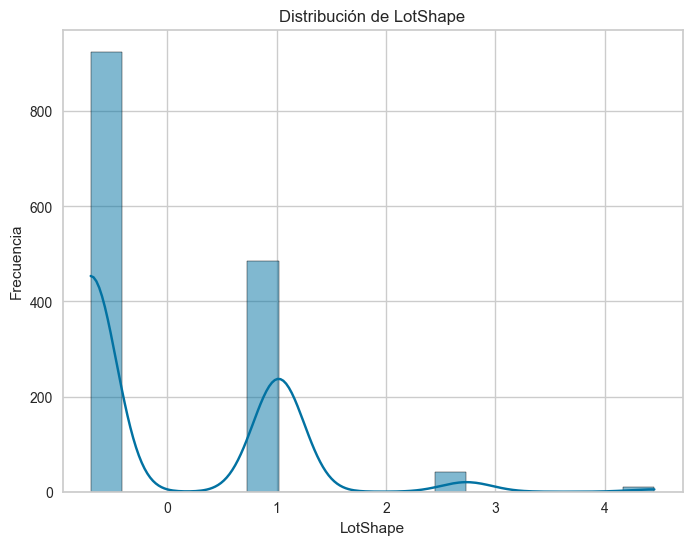

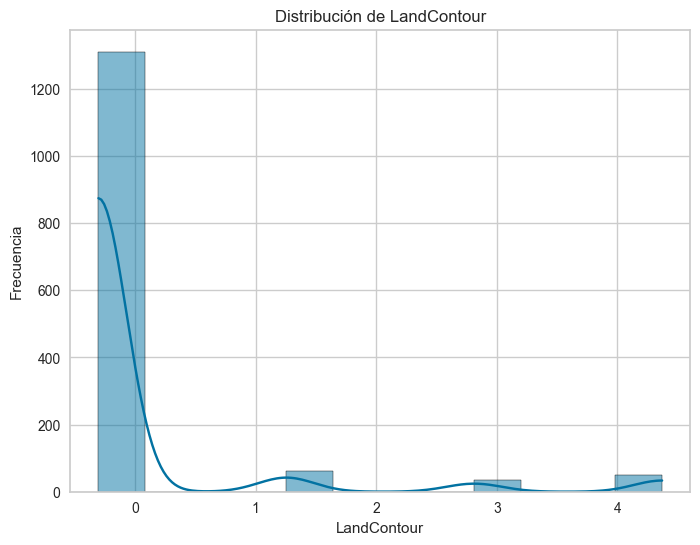

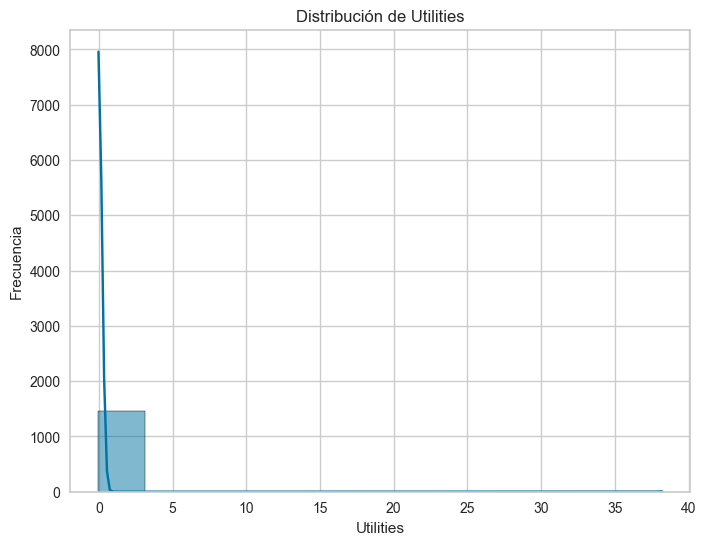

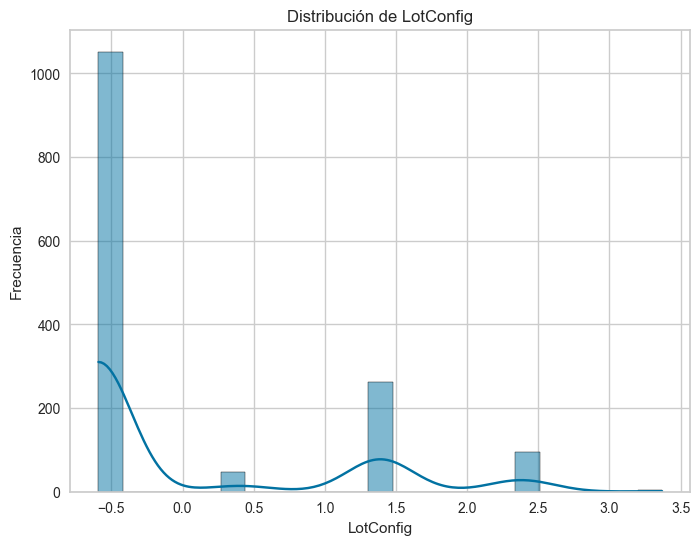

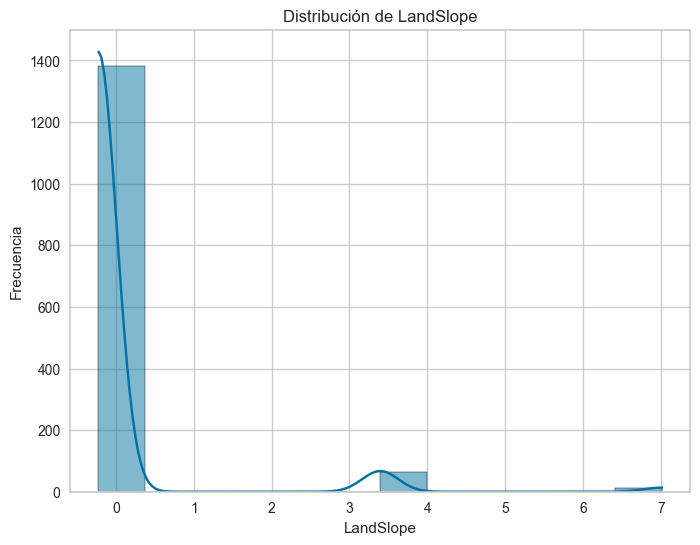

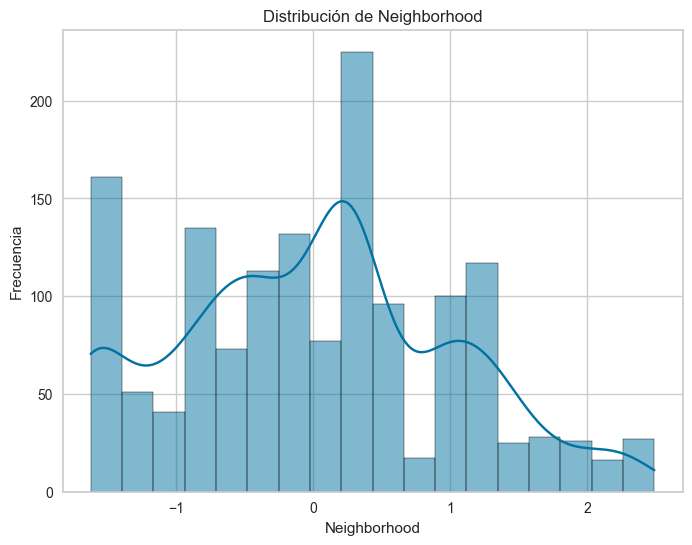

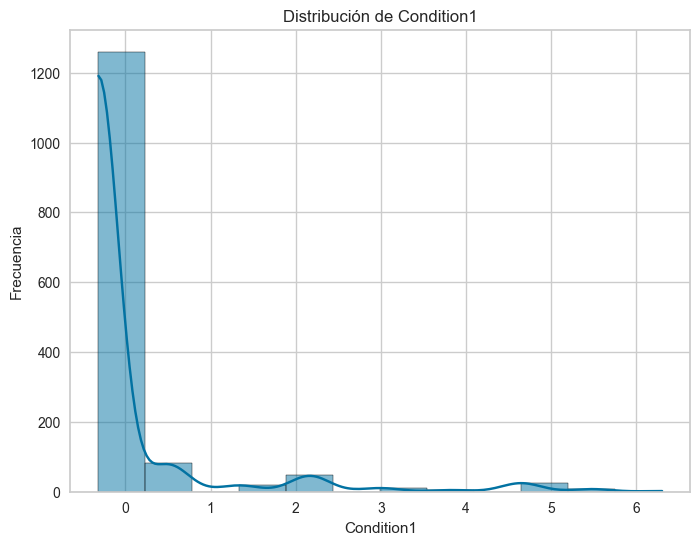

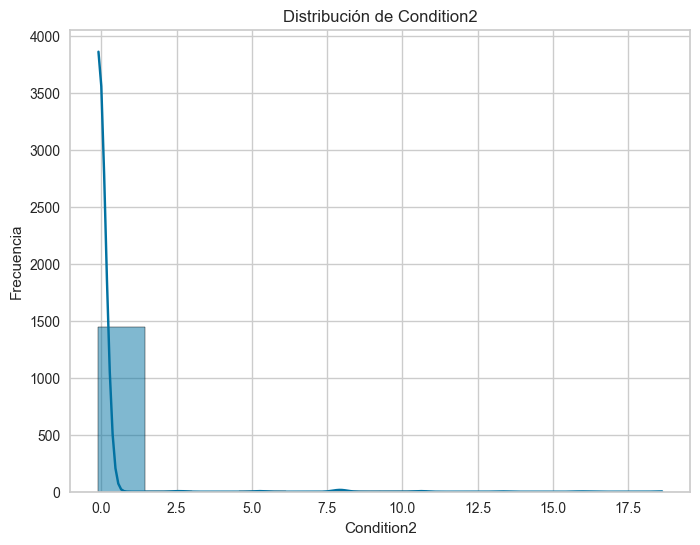

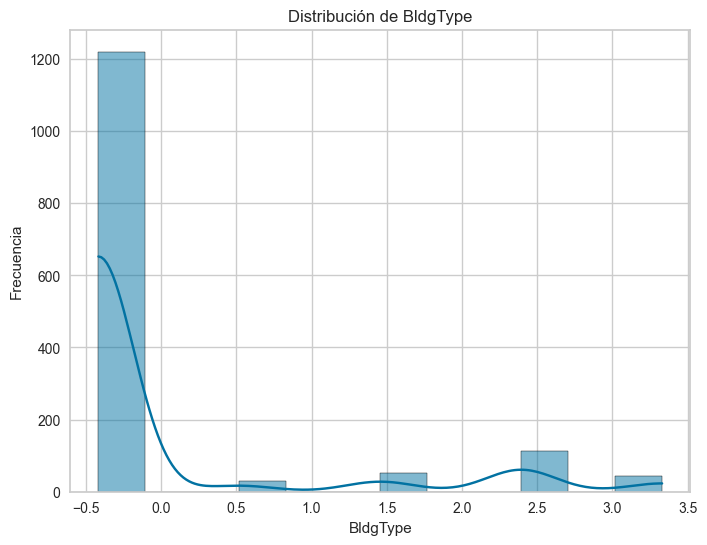

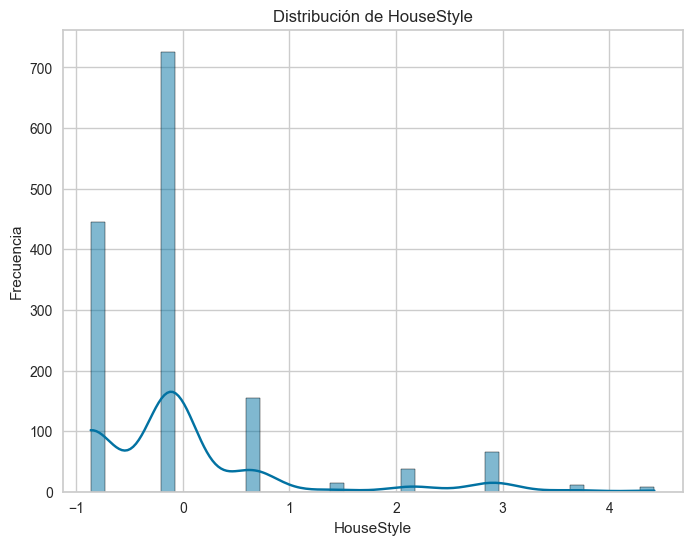

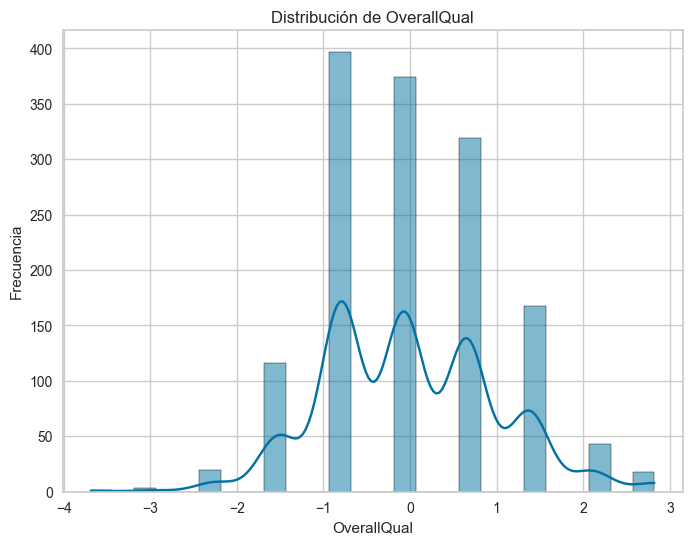

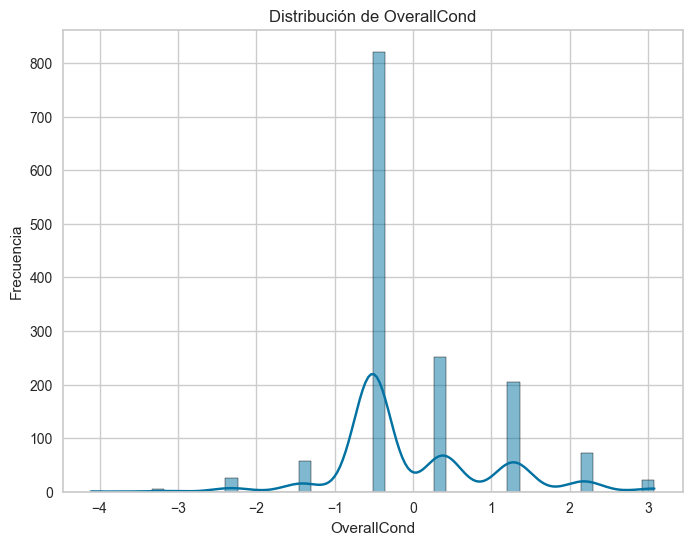

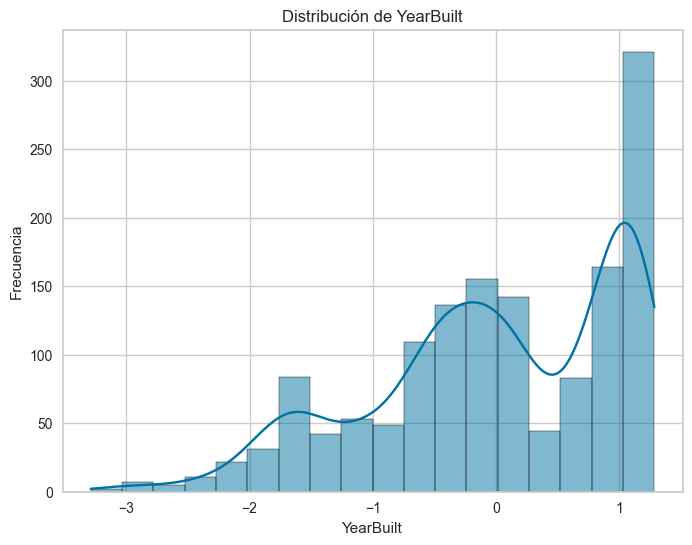

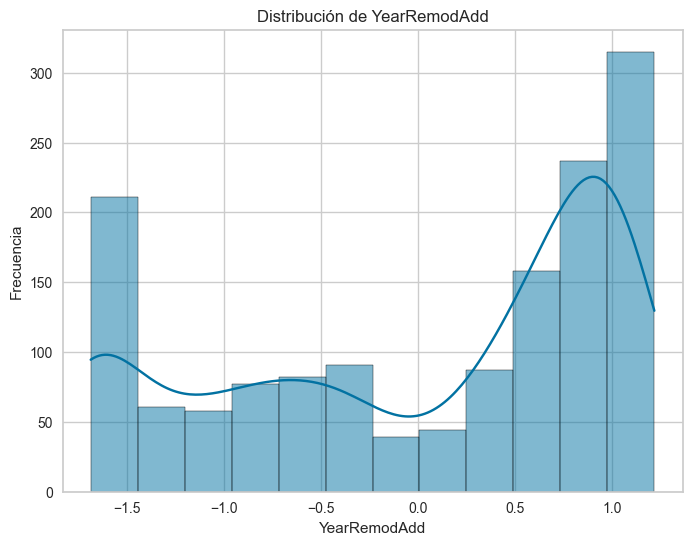

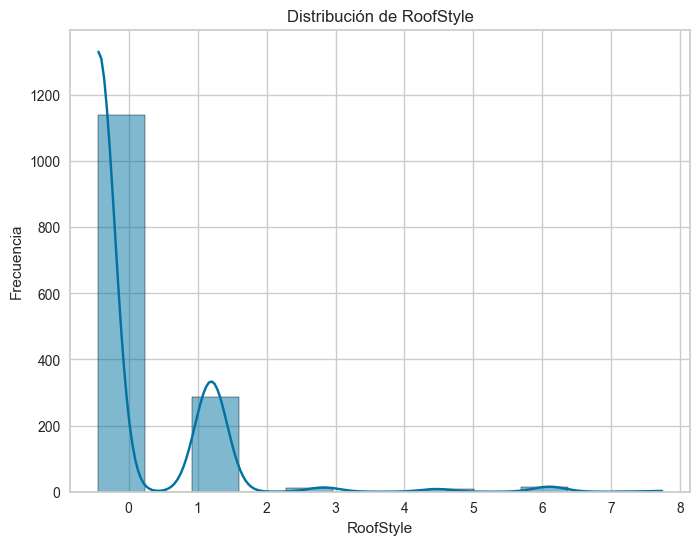

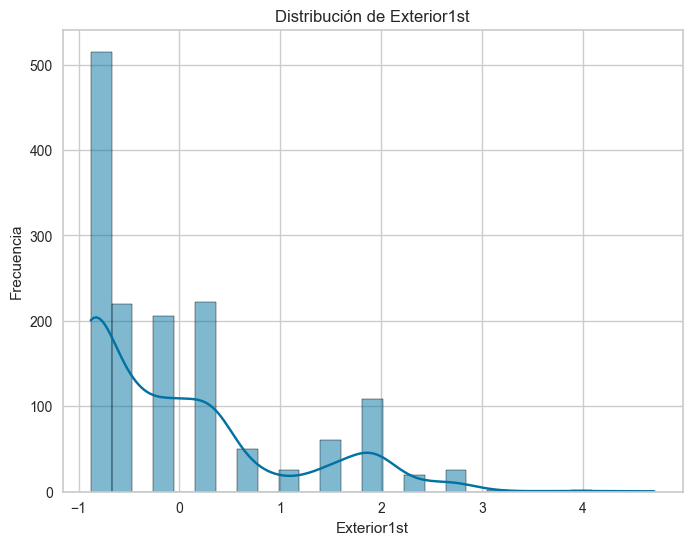

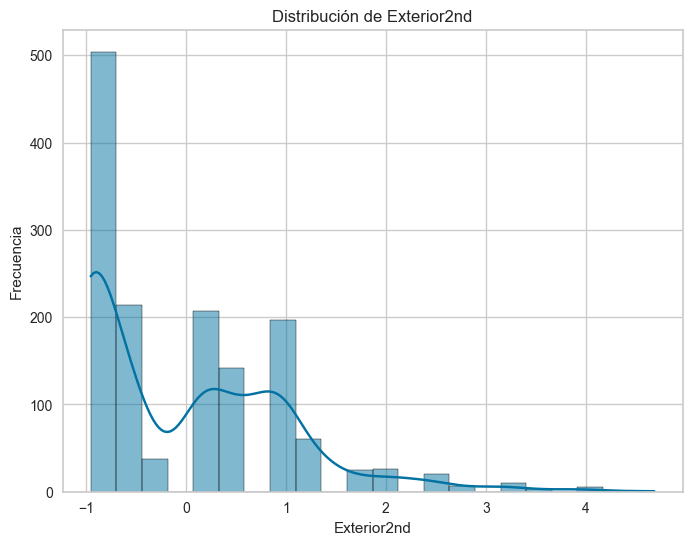

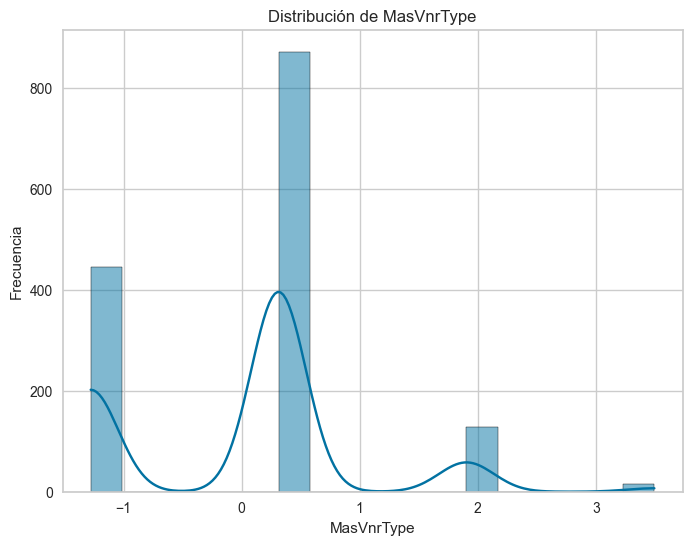

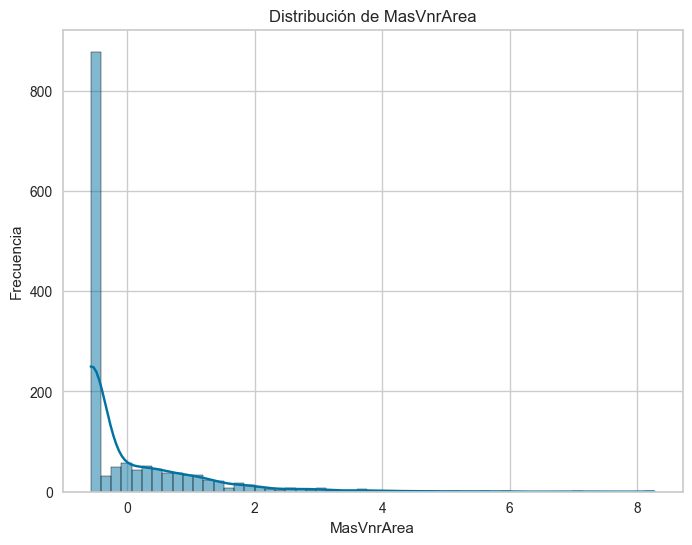

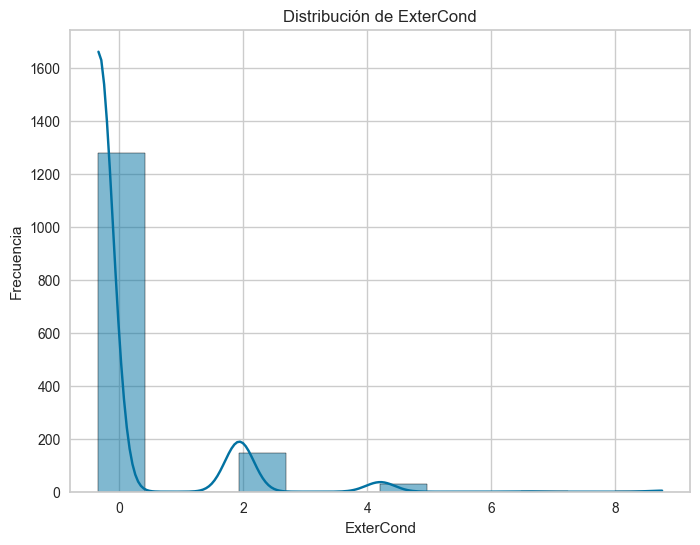

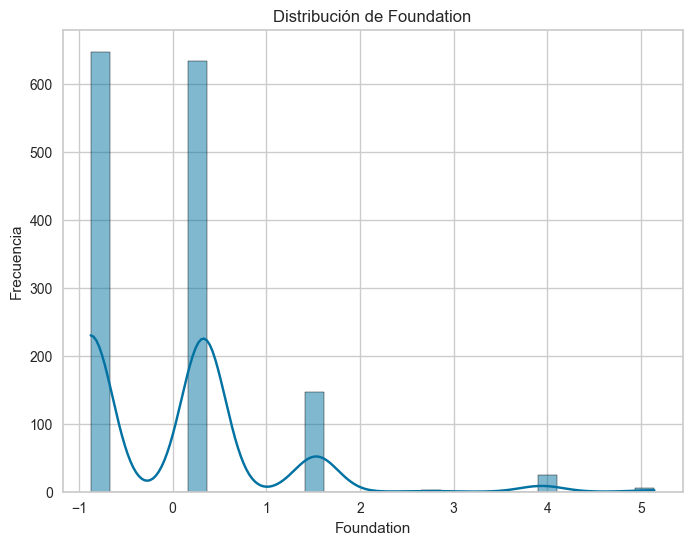

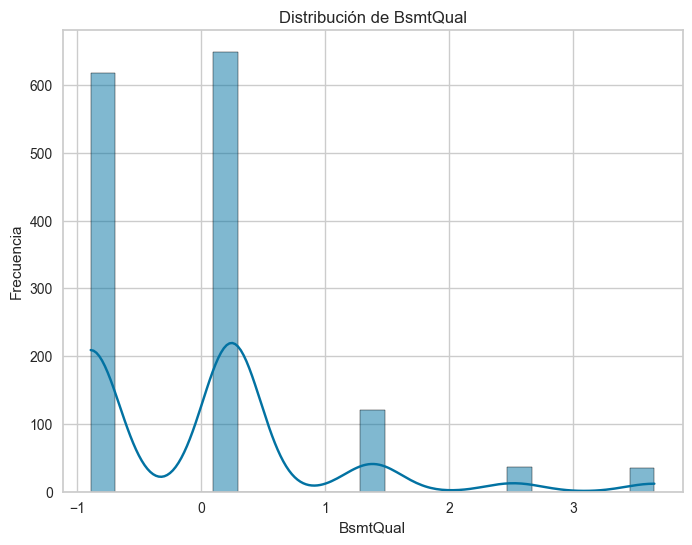

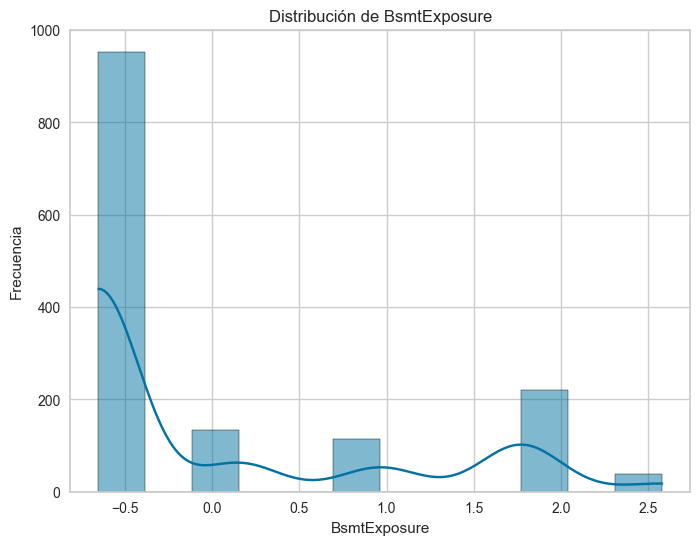

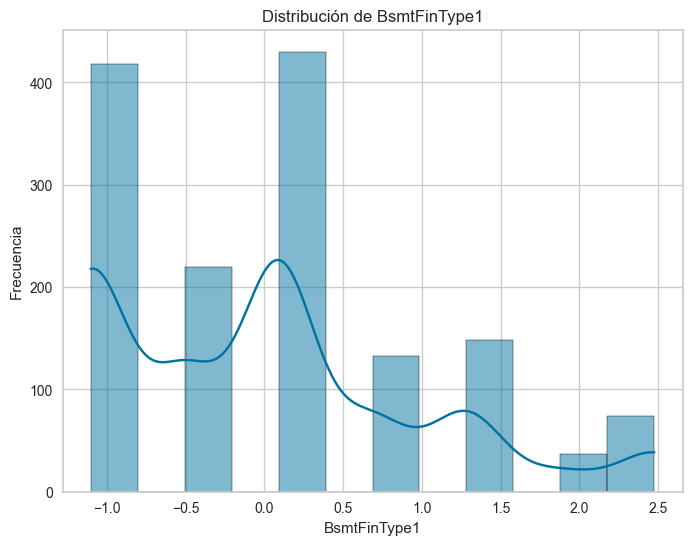

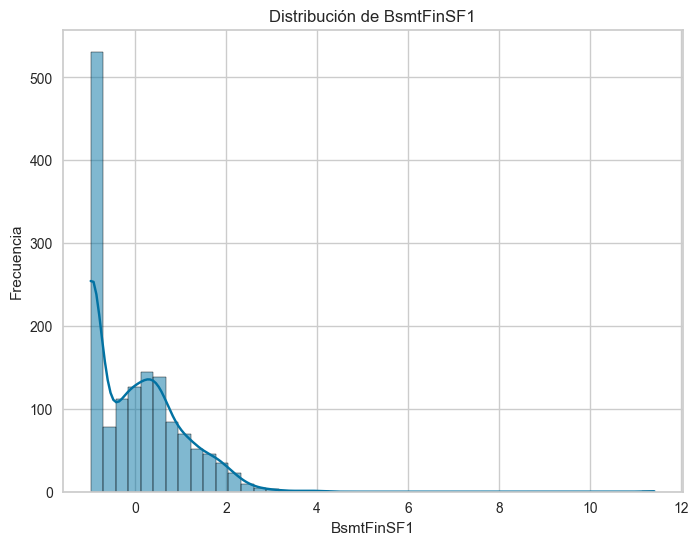

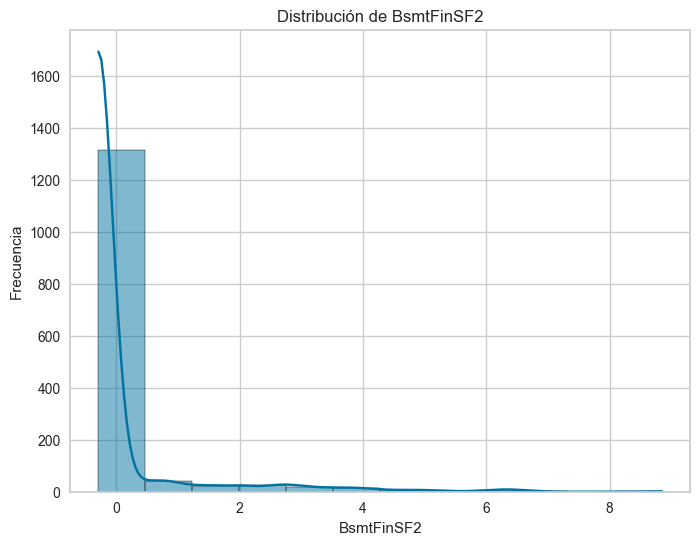

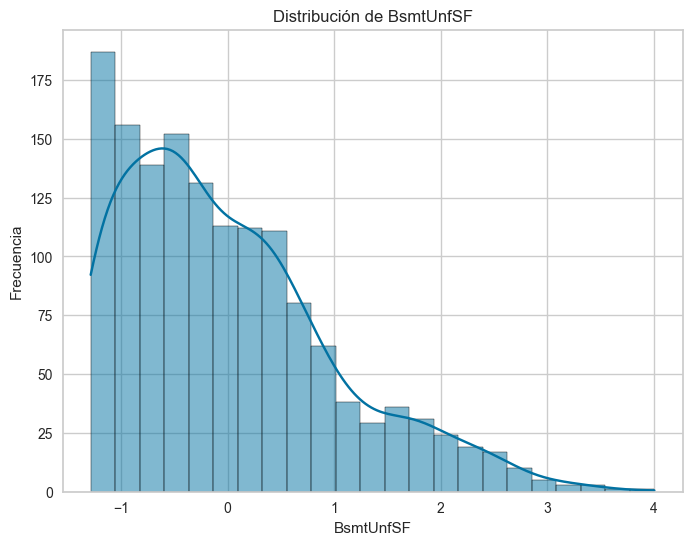

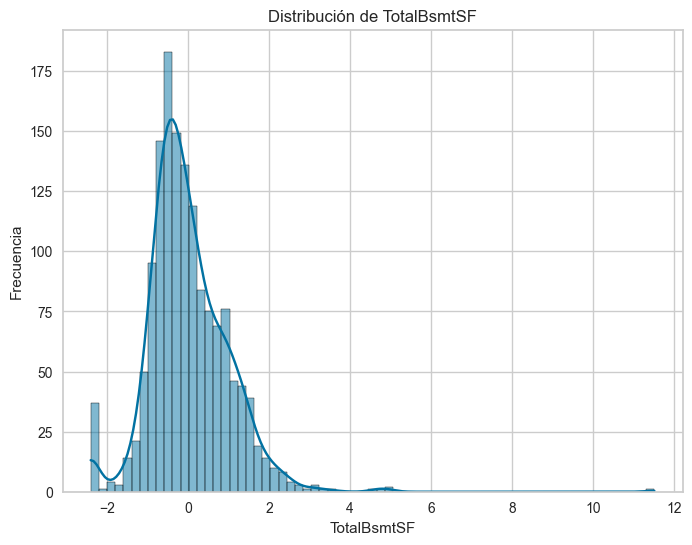

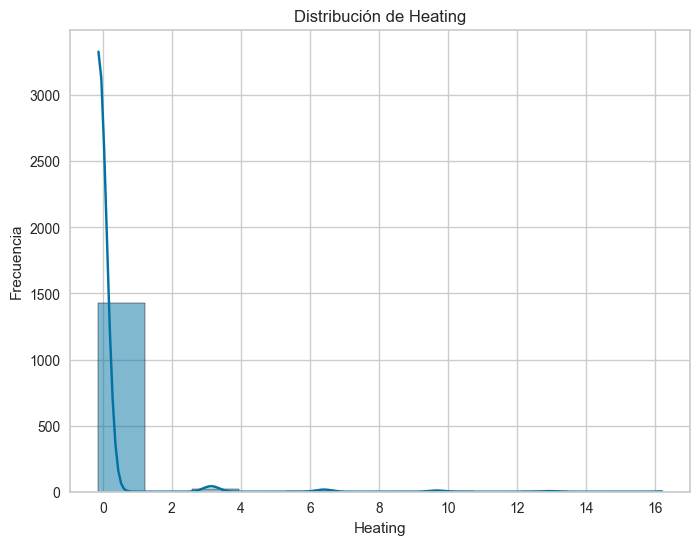

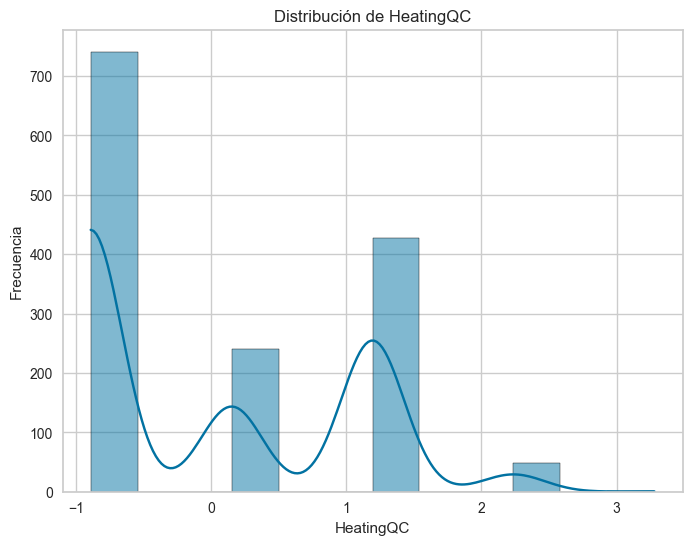

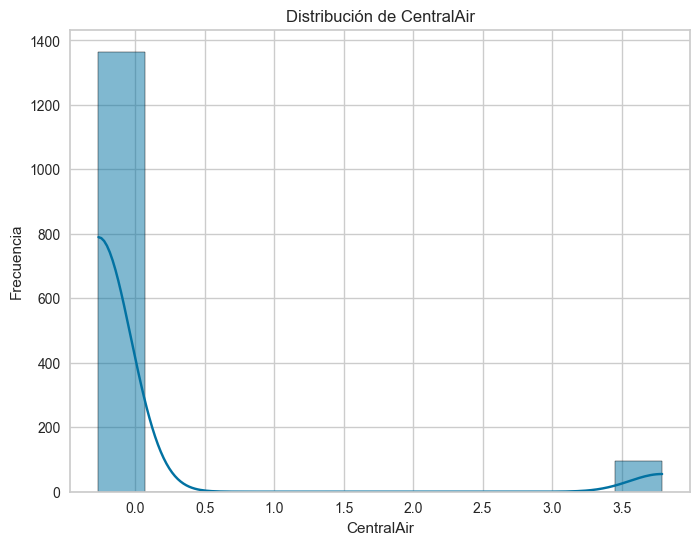

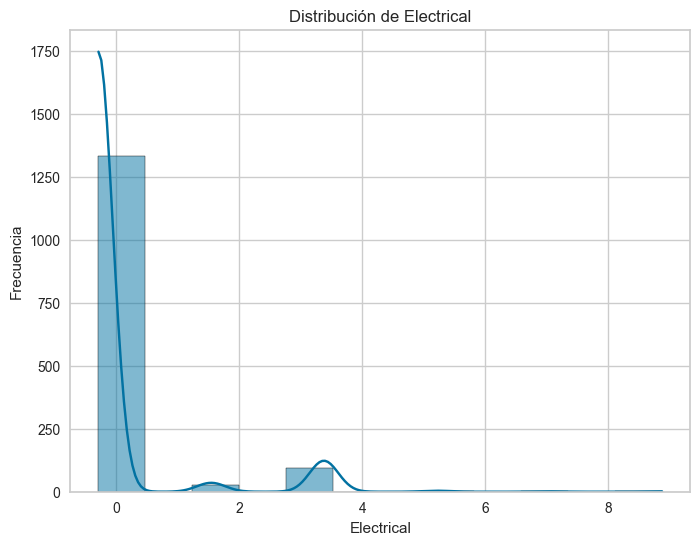

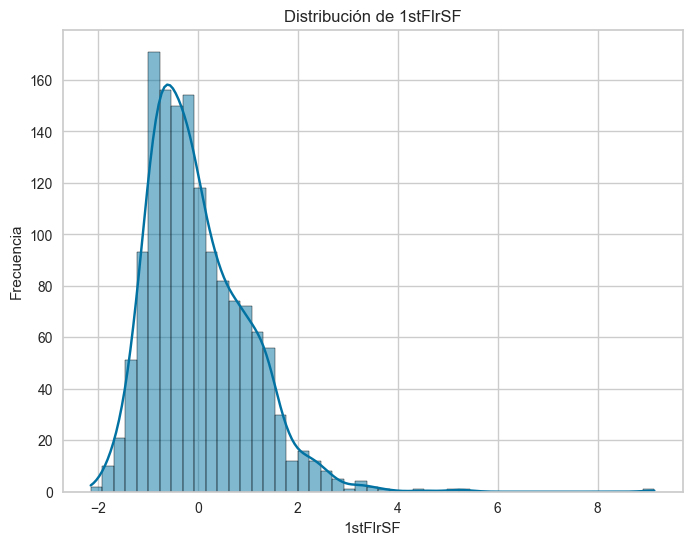

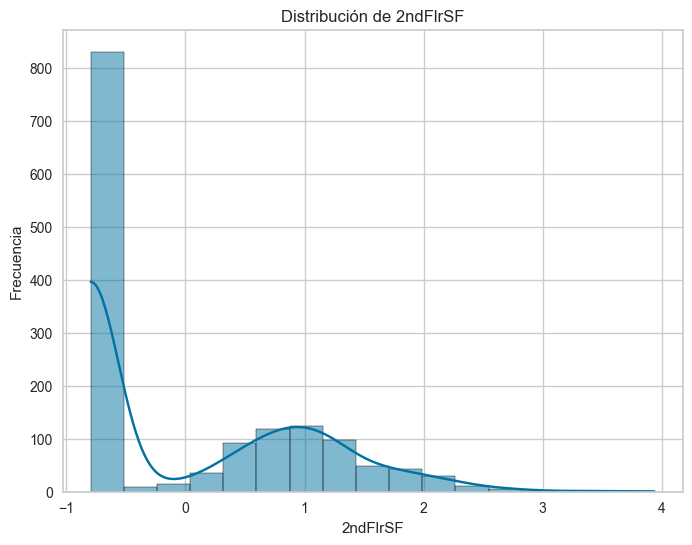

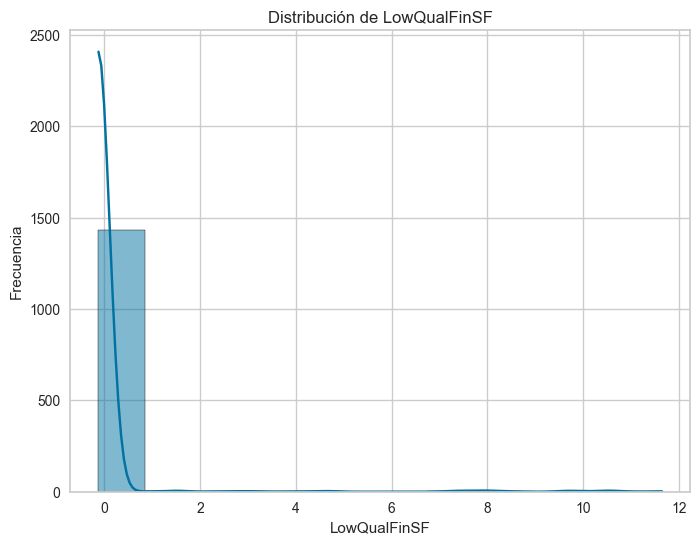

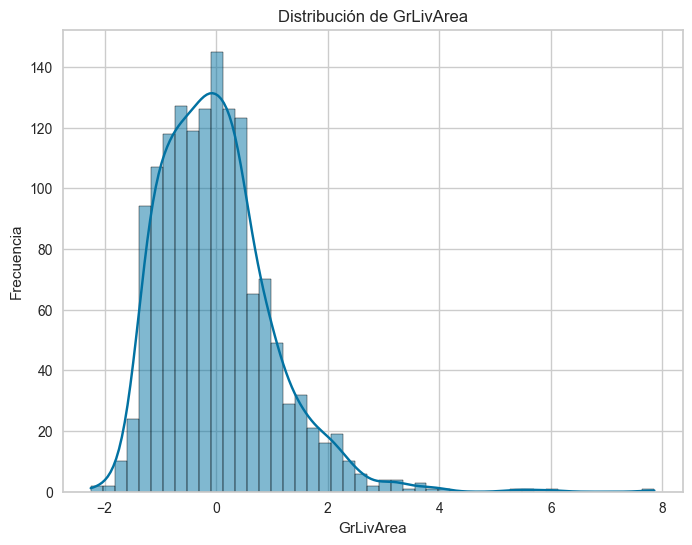

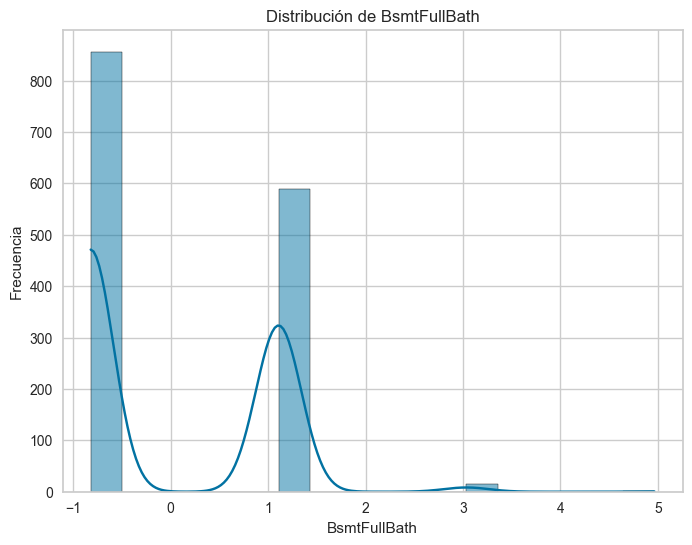

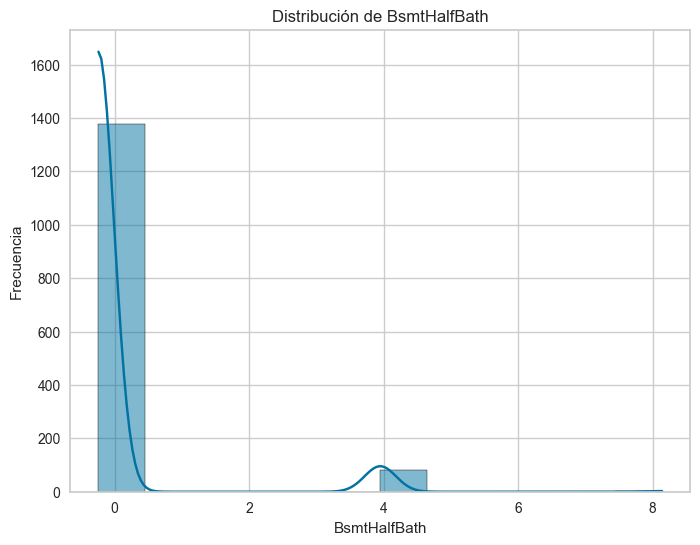

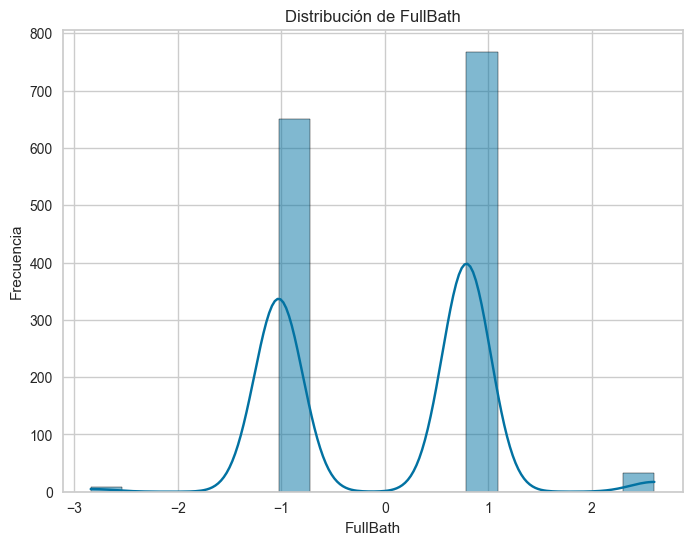

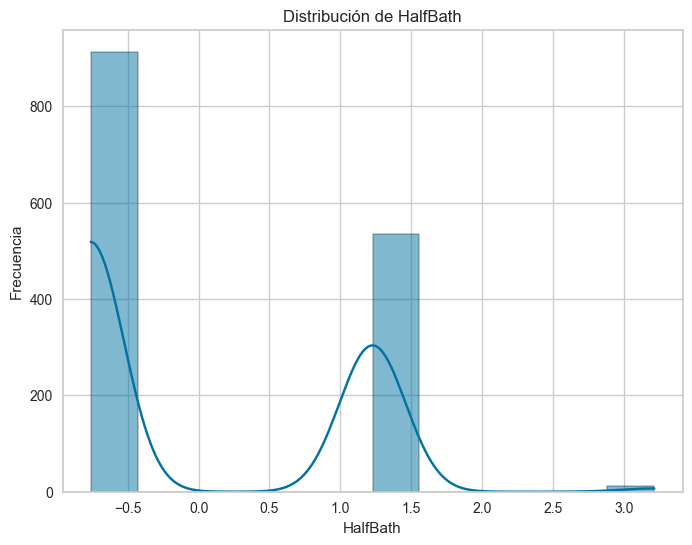

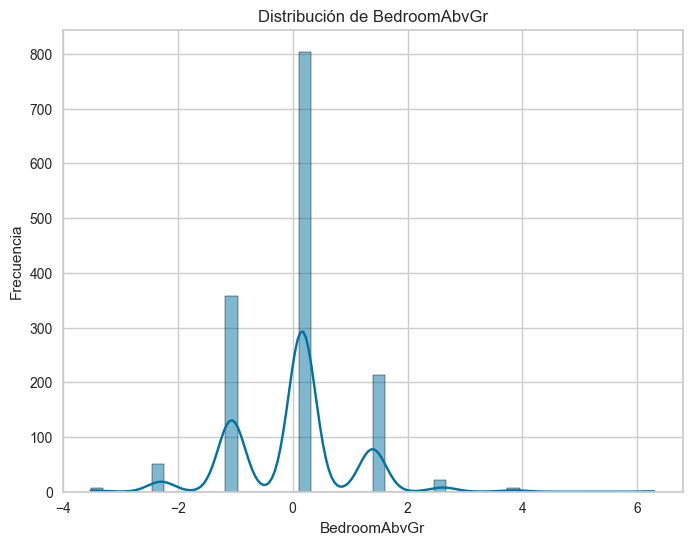

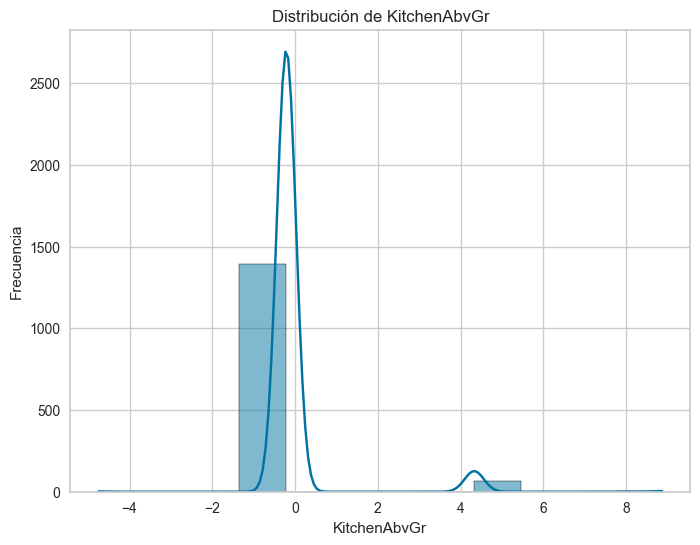

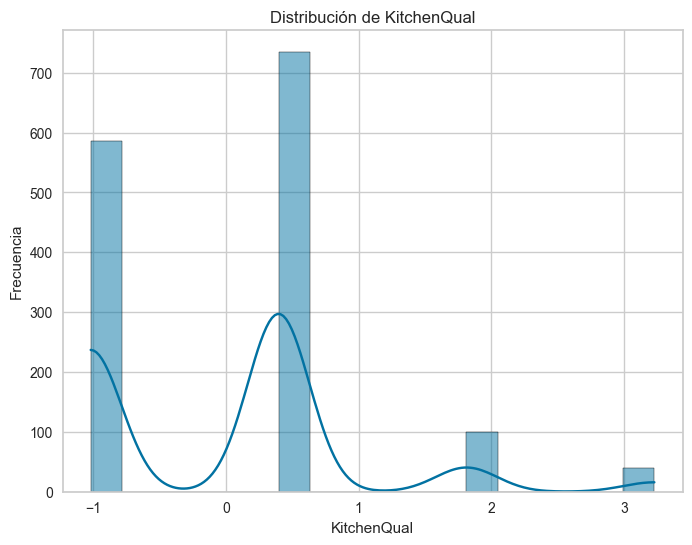

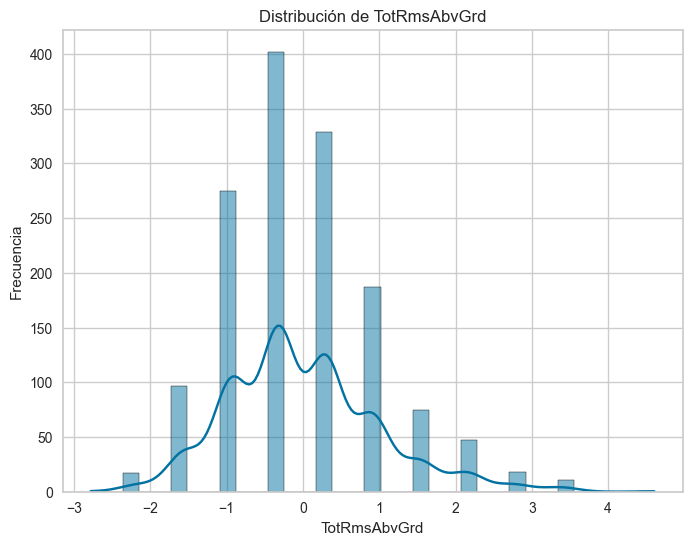

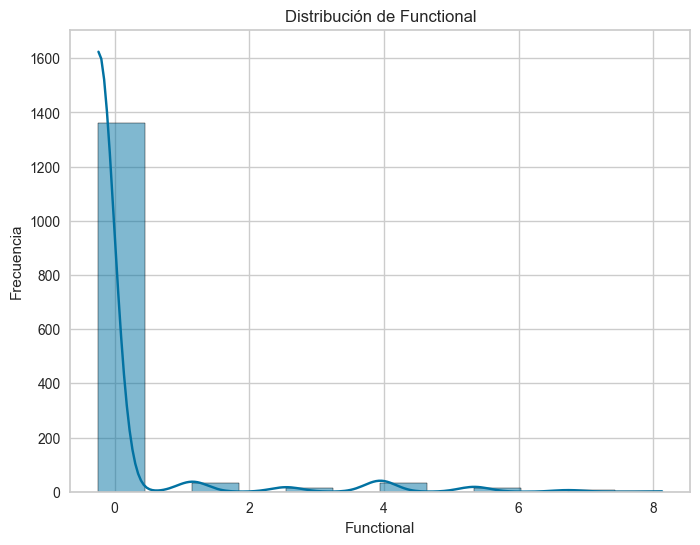

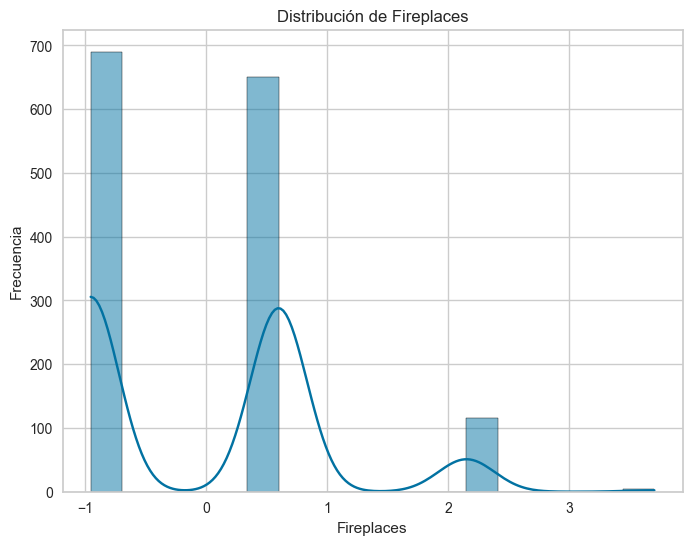

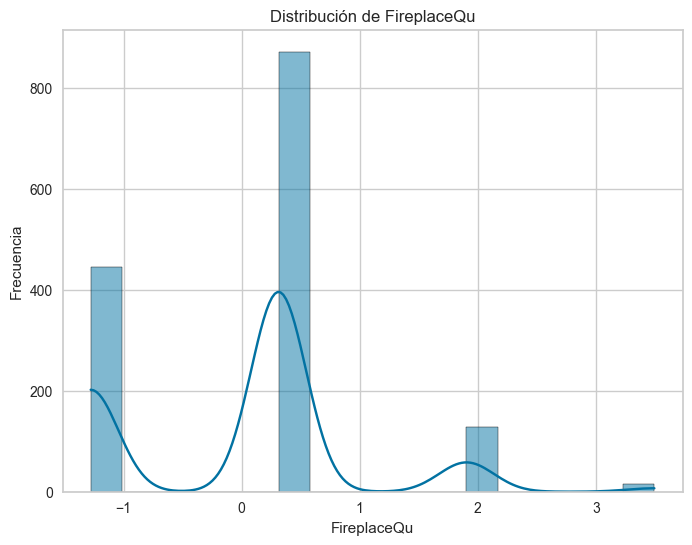

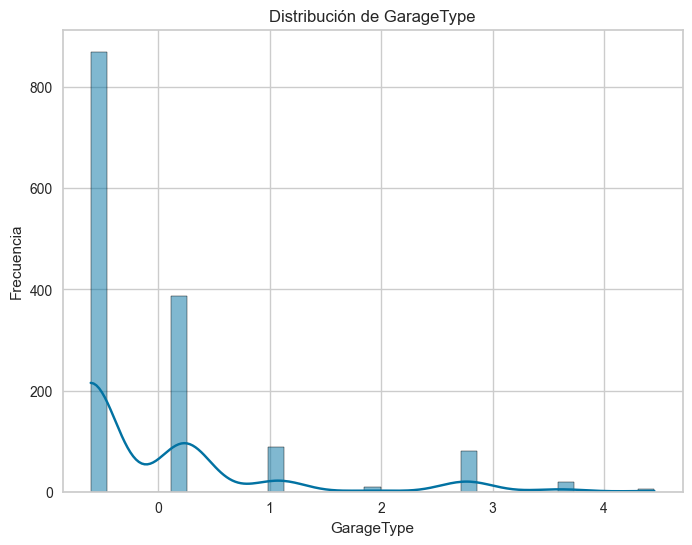

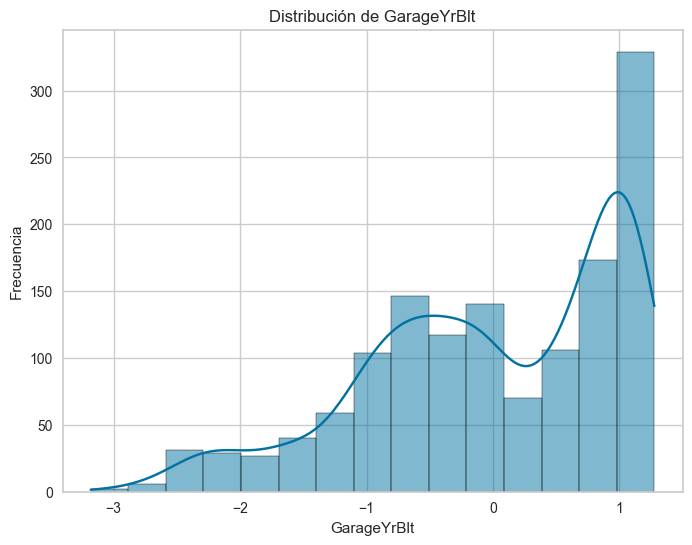

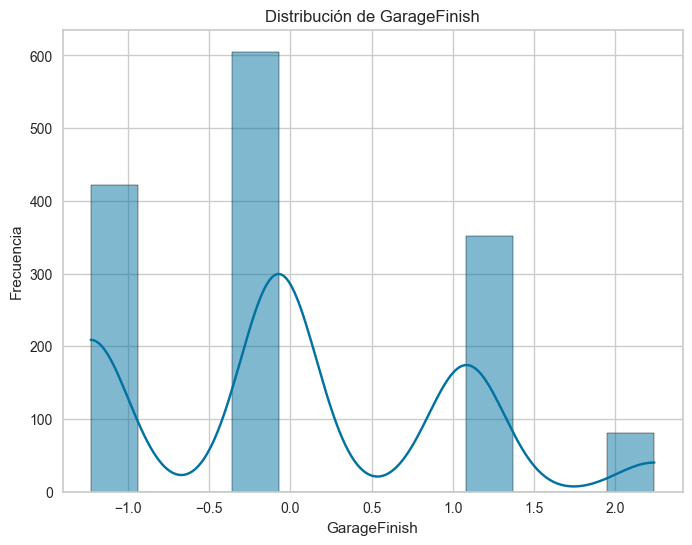

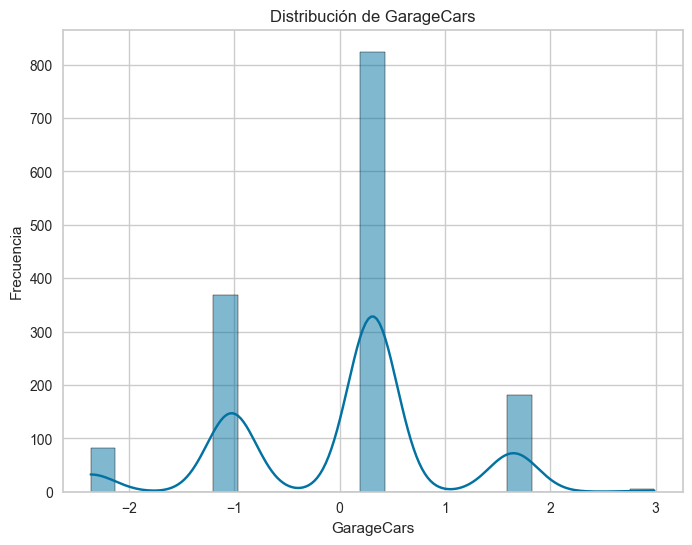

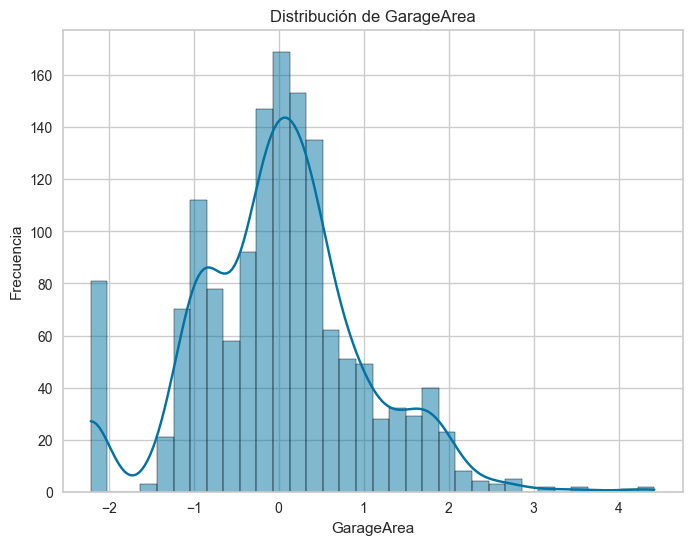

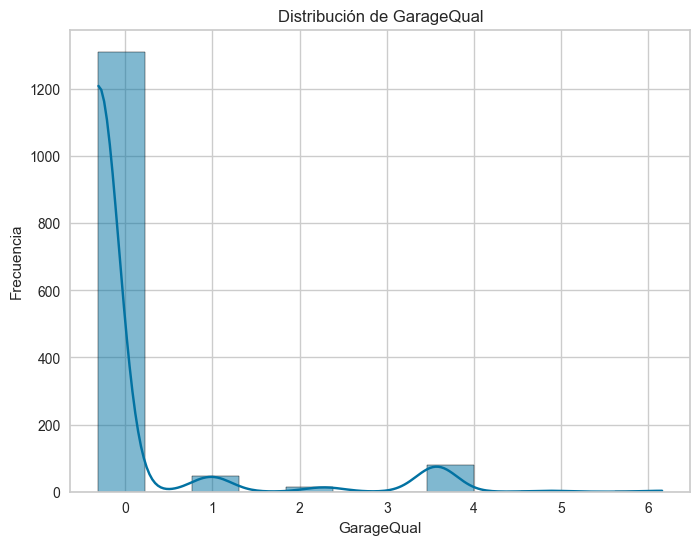

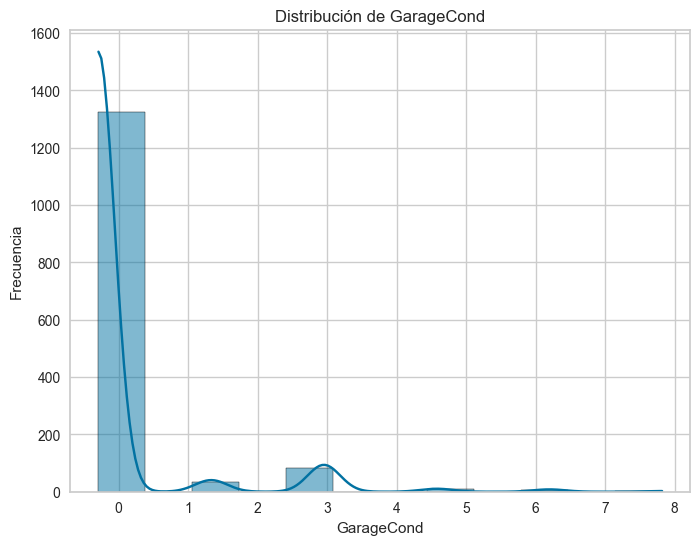

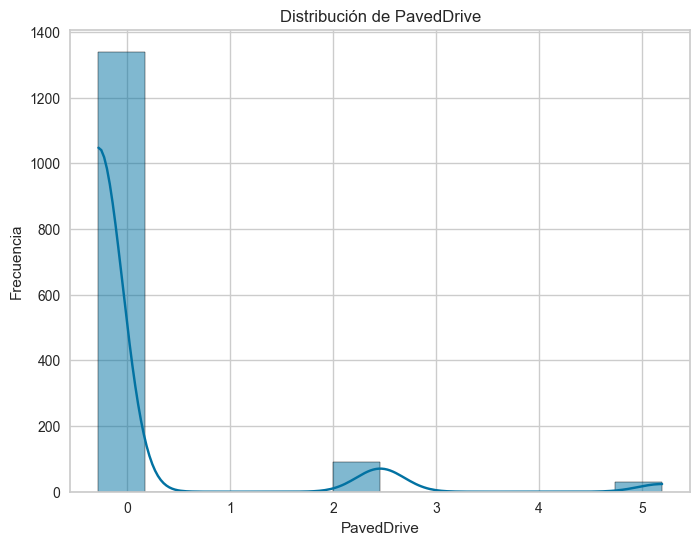

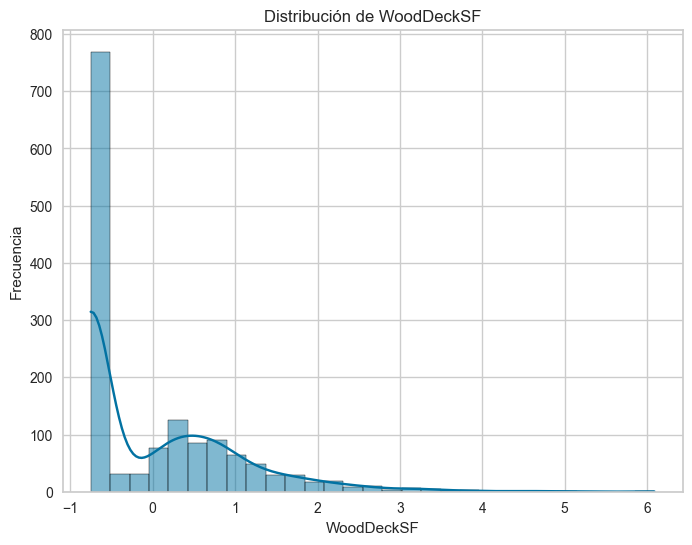

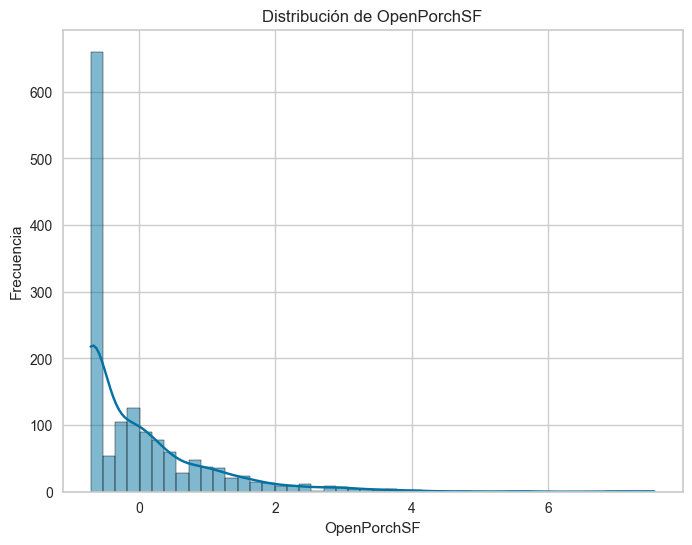

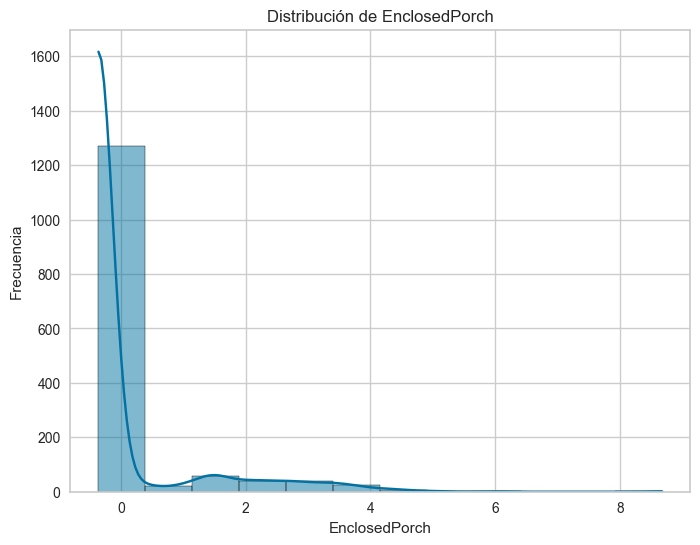

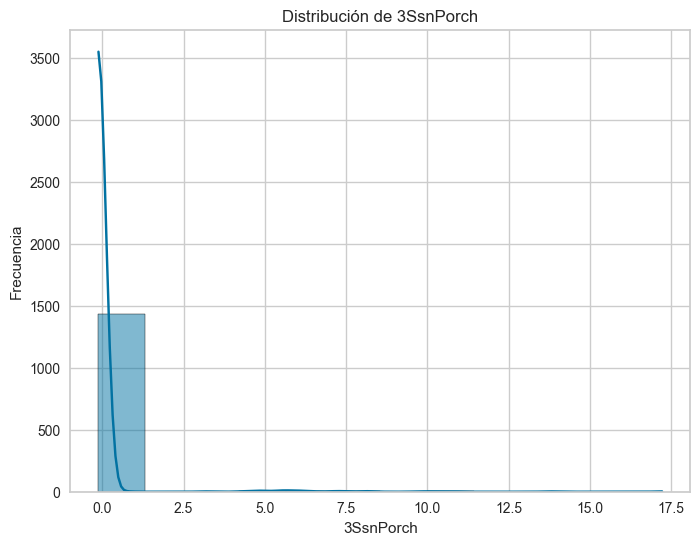

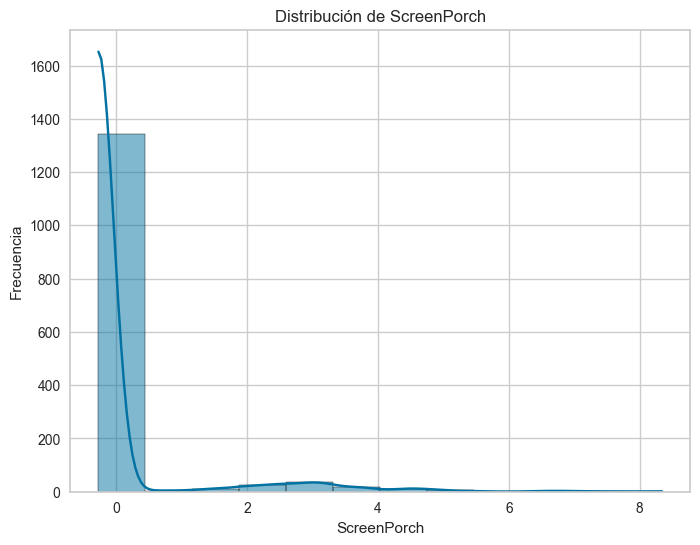

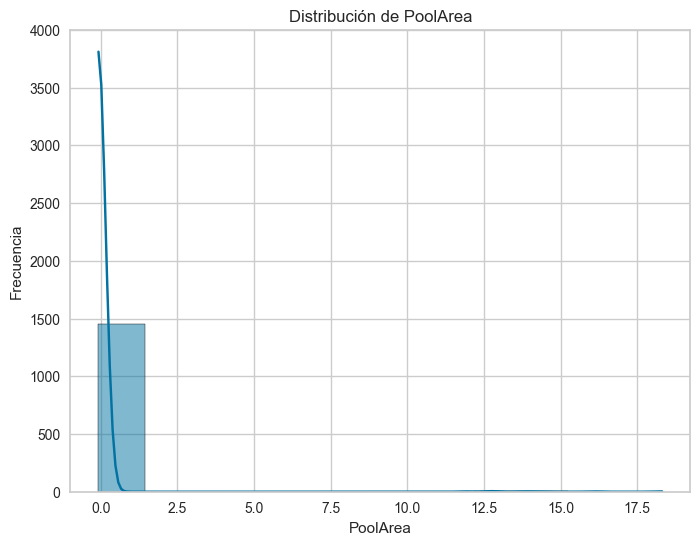

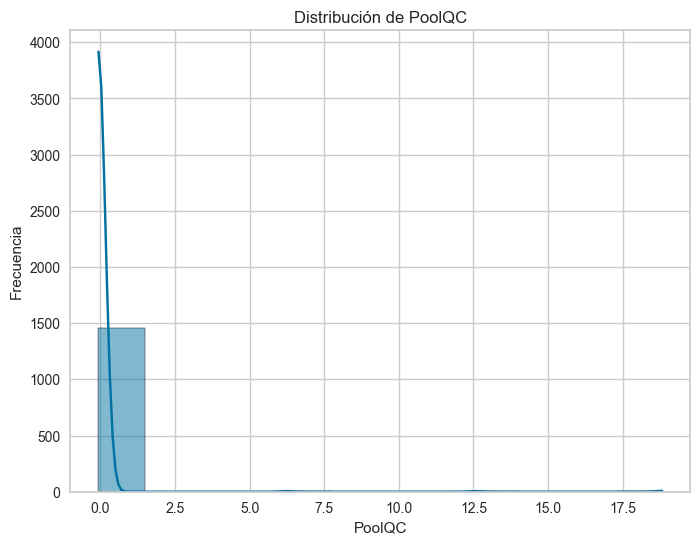

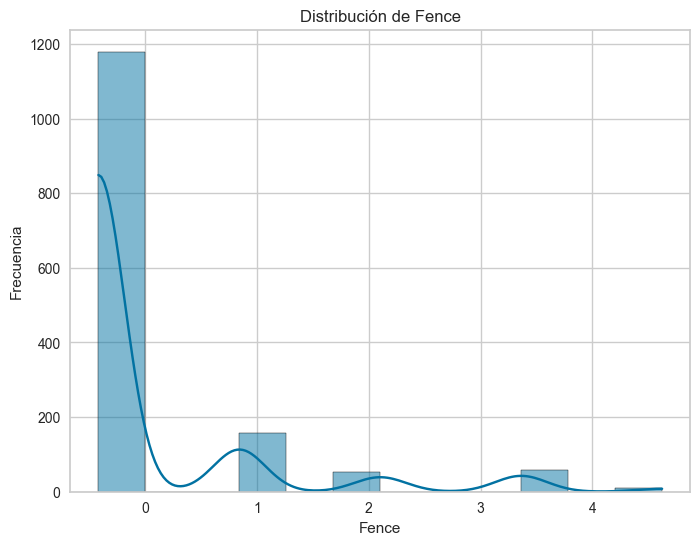

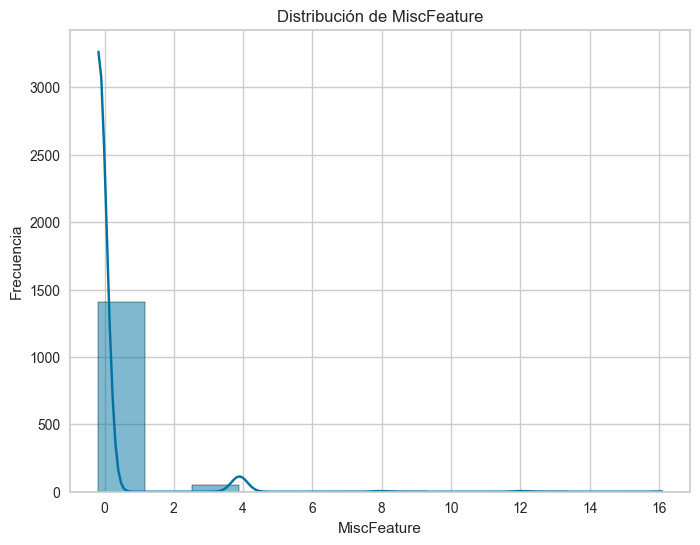

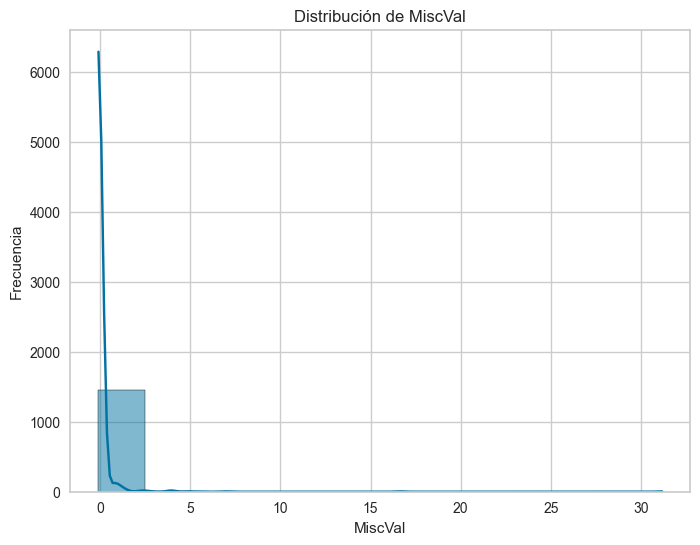

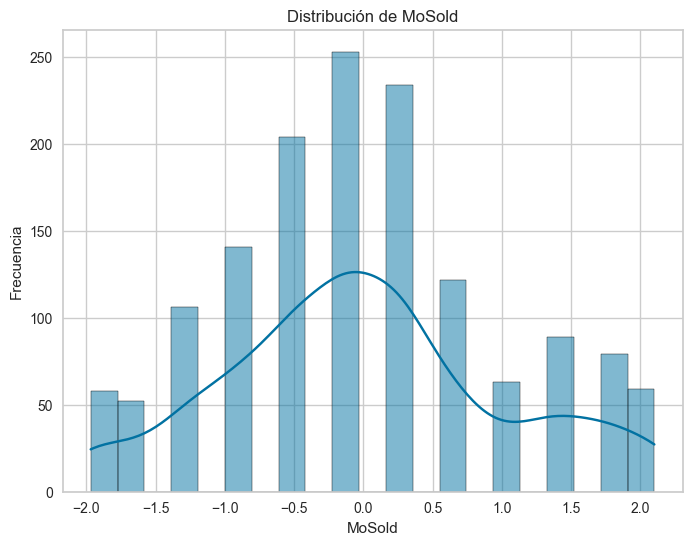

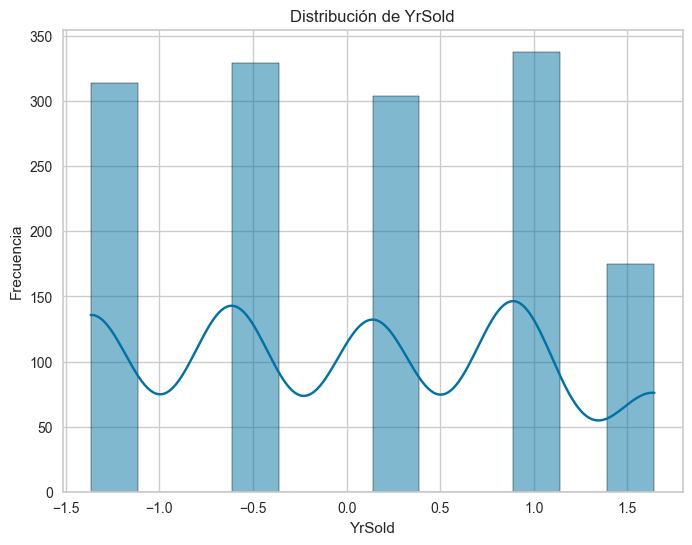

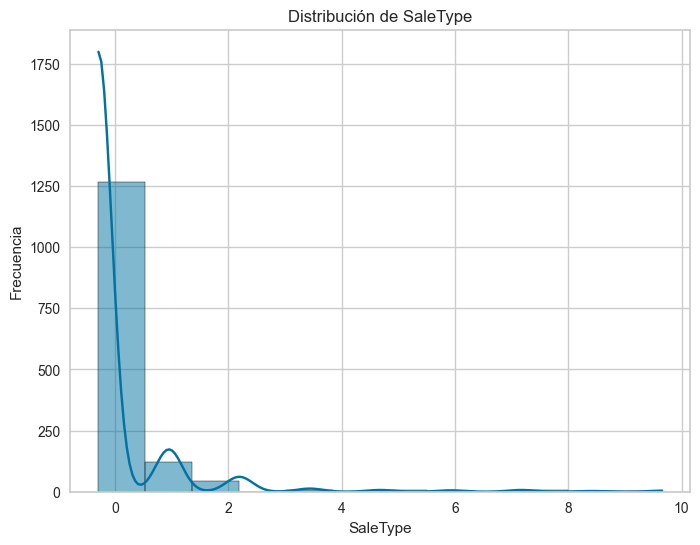

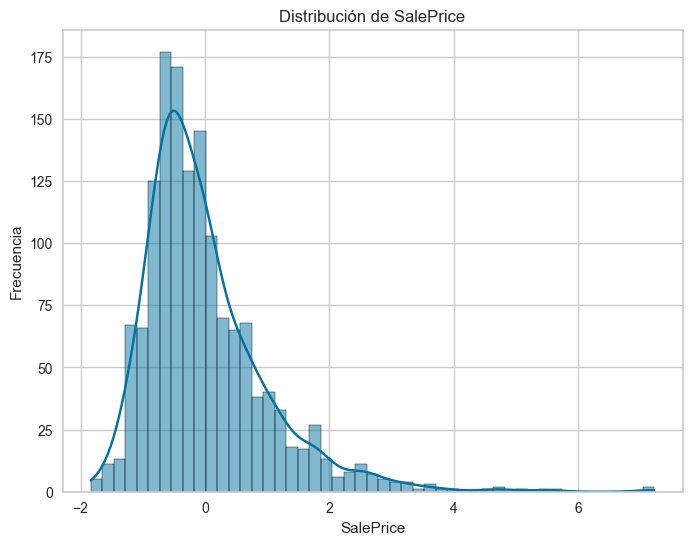

Comparación entre MSSubClass y MSZoning: Estadística=0.4144, p-valor=0.0000
Comparación entre MSSubClass y LotFrontage: Estadística=0.2452, p-valor=0.0000
Comparación entre MSSubClass y LotArea: Estadística=0.3555, p-valor=0.0000
Comparación entre MSSubClass y Street: Estadística=0.5240, p-valor=0.0000
Comparación entre MSSubClass y Alley: Estadística=0.5123, p-valor=0.0000
Comparación entre MSSubClass y LotShape: Estadística=0.3671, p-valor=0.0000
Comparación entre MSSubClass y LandContour: Estadística=0.4808, p-valor=0.0000
Comparación entre MSSubClass y Utilities: Estadística=0.5240, p-valor=0.0000
Comparación entre MSSubClass y LotConfig: Estadística=0.4144, p-valor=0.0000
Comparación entre MSSubClass y LandSlope: Estadística=0.5212, p-valor=0.0000
Comparación entre MSSubClass y Neighborhood: Estadística=0.2452, p-valor=0.0000
Comparación entre MSSubClass y Condition1: Estadística=0.4459, p-valor=0.0000
Comparación entre MSSubClass y Condition2: Estadística=0.5240, p-valor=0.0000
C

In [139]:
df = dataframe.copy()
df2n = df.select_dtypes(include='number').copy()

scaler = StandardScaler()
df2 = scaler.fit_transform(df2n)
df2 = pd.DataFrame(df2, columns=df2n.columns)

shapiro_results = []
shapiro_resultsD = {}
anderson_results = []
anderson_resultsD = {}

for column in df2.columns:
    stat, p_value = shapiro(df[column])
    print(f'Columna {column}: Estadística={stat:.4f}, p-valor={p_value:.4f}')
    
    # Interpretación del resultado
    if p_value > 0.05:
        print(f'\033[92mLa columna {column} sigue una distribución normal.\033[0m')
        shapiro_results.append(column)
        shapiro_resultsD[column] = p_value
    else:
        print(f'\033[91mLa columna {column} no sigue una distribución normal.\033[0m')
    
for column in df2.columns:
    result = anderson(df[column])
    statistic = result.statistic
    critical_values = result.critical_values
    significance_level = result.significance_level

    print(f'Columna {column}: Estadística={statistic:.4f}')

    # Comparar la estadística con los valores críticos
    for i, alpha in enumerate([15.0, 10.0, 5.0, 2.5, 1.0]):
        if statistic > critical_values[i]:
            print(f'La columna {column} no sigue una distribución normal al {alpha}% de confianza.')
            break
    else:
        print(f'\033[92mLa columna {column} sigue una distribución normal al 1% de confianza.\033[0m')
        anderson_results.append(column)
        anderson_resultsD[column] = statistic


for column in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Prueba de Kolmogorov-Smirnov para cada par de columnas
for i in range(len(df2.columns)):
    for j in range(i+1, len(df2.columns)):
        stat, p_value = ks_2samp(df2.iloc[:, i], df2.iloc[:, j])
        print(f'Comparación entre {df2.columns[i]} y {df2.columns[j]}: Estadística={stat:.4f}, p-valor={p_value:.4f}')


# Resultados
De esta manera las columnas que muestran distribuciones normales son:

In [140]:
print("Segun Shapiro las que siguen una distribucion normal son:")

for shap in shapiro_results:
    print(shap,"con un p value de : ", shapiro_resultsD[shap])

print("\nSegun Anderson las que siguen una distribucion normal son:")
for andie in anderson_results:
    print(andie, "con un valor de: ", anderson_resultsD[andie])

Segun Shapiro las que siguen una distribucion normal son:
MasVnrArea con un p value de :  1.0
GarageYrBlt con un p value de :  1.0

Segun Anderson las que siguen una distribucion normal son:
MasVnrArea con un valor de:  nan
GarageYrBlt con un valor de:  nan


Tras realizar el análisis exploratorio se decidió hacer un mapa de calor de los datos para obtener una matriz de correlación y así verificar si existen relaciones lineales entre las variables estudiadas.

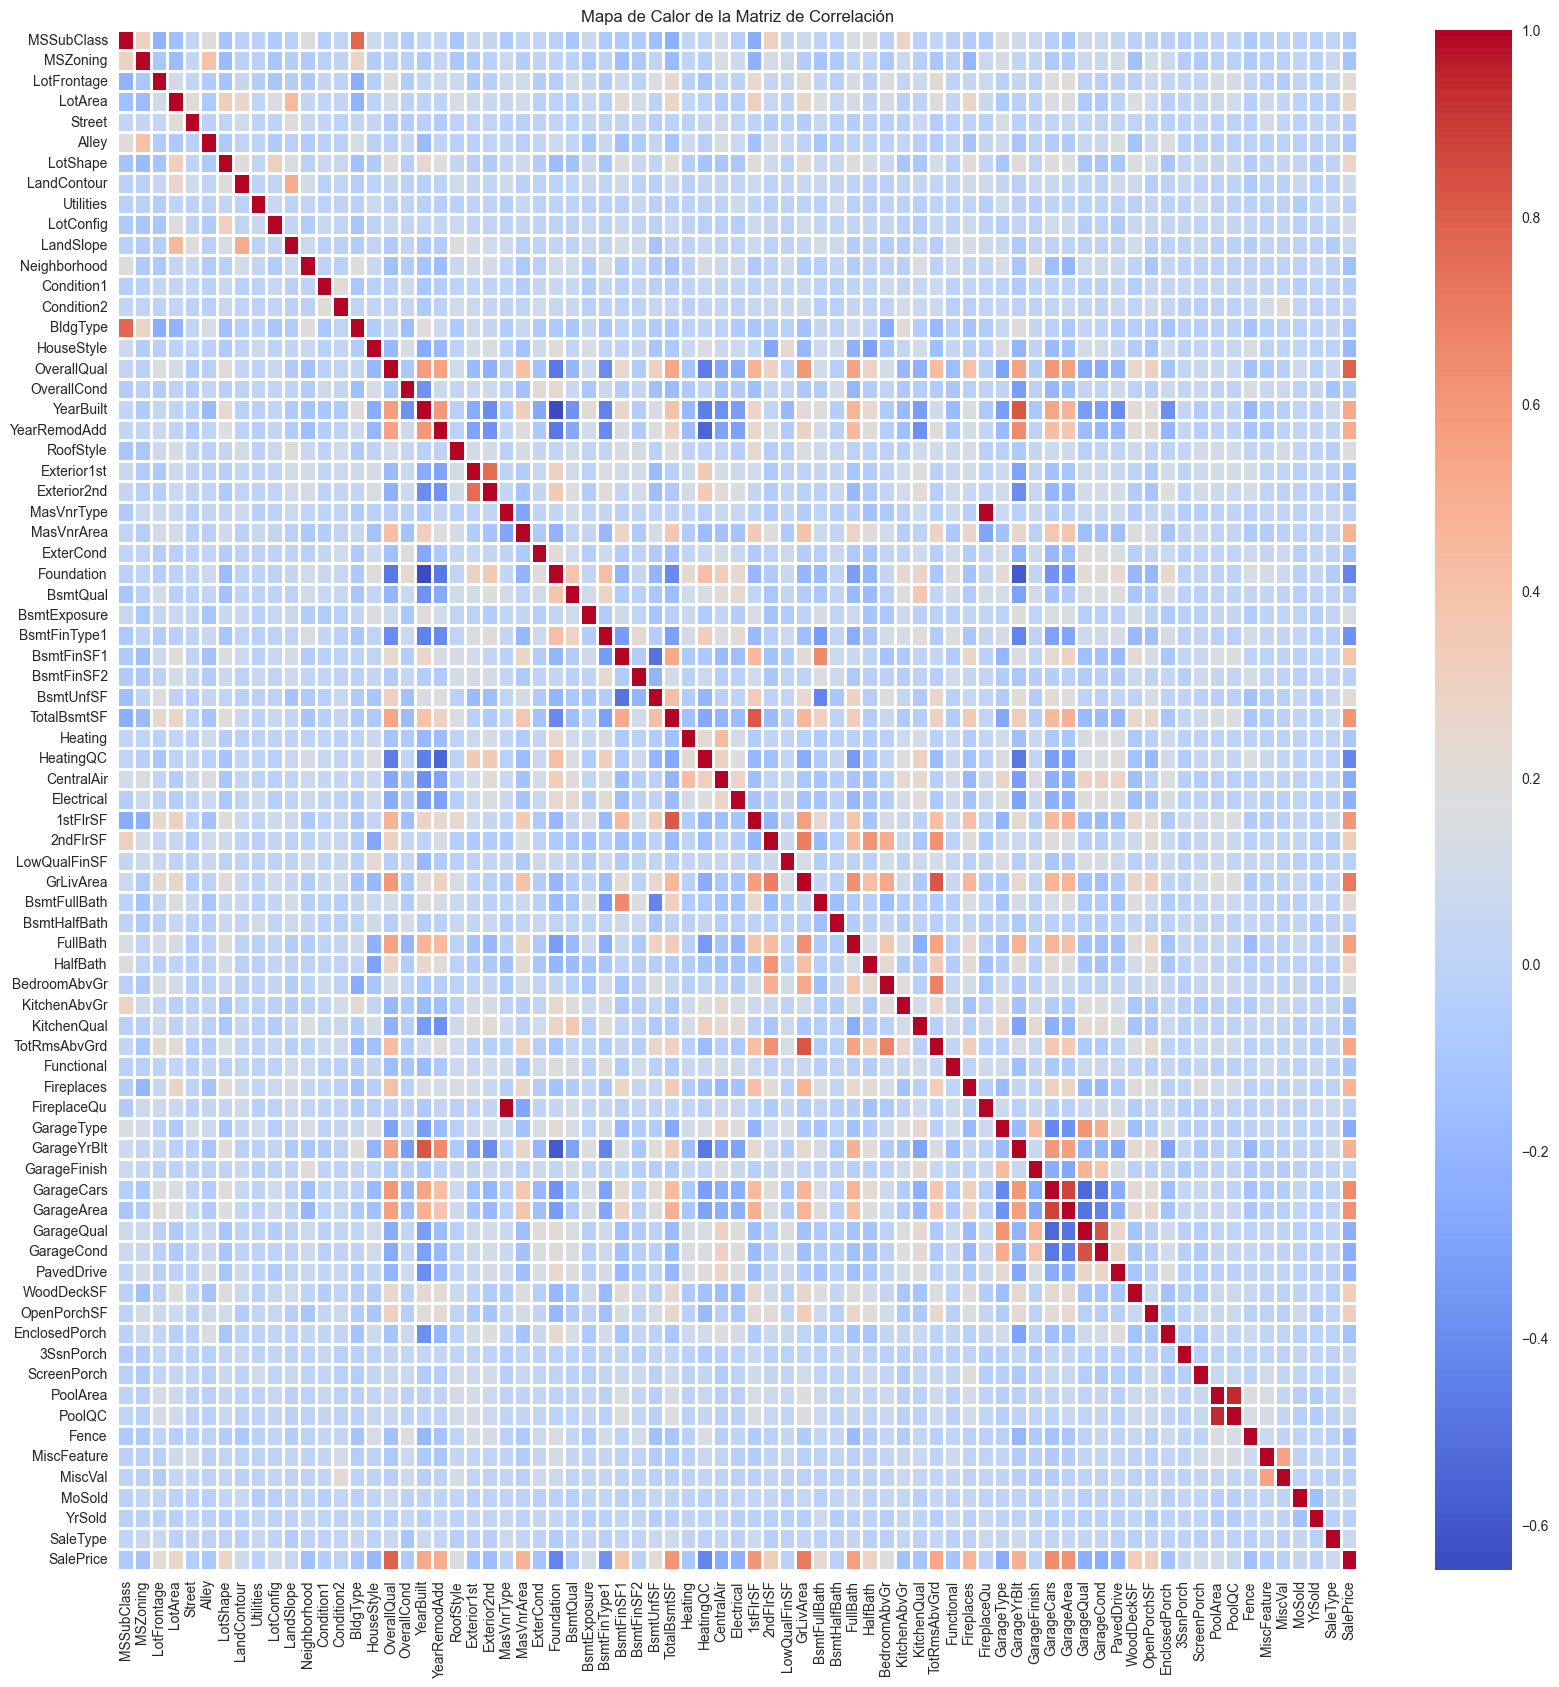

In [141]:
df_numeric = dataframe.select_dtypes(include='number').copy()

# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 20))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=1)

plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

De las correlaciones relevantes relacionadas con la variable de estudio **salePrice** se destacan:

Correlación alta:
- OverallQual
- GarageCars
- GarageArea
- GrLivArea
- FullBath
- Fireplaces

Correlación media-alta:
- YearBuilt
- YearRemodAdd
- MasVnrArea
- 1stFIrSF
- TotRmsAbvGrd
- GarageYrBlt
  
Correlación media:
- LotFrontage
- LotArea
- LotShape
- BsmtUnfSF
- 2ndSFrSF
- BsmtFullBath
- HalfBath
- BedroomAbrGr
- WoodDeckSF
- OpenPorchSF

(Ingeniería de características) Por lo que para realizar predicciones mediante el modelo de regresión lineal, se podría utilizar cualquiera de las mencionadas. La que se seleccionará es OverallQual para realizar tanto el clustering como el modelo de regresión lineal debido a que es la que presenta mejor correlación y por lo tanto, puede ser la variable más predictora. 

### Clustering
Del total de columnas que contenía el dataset original, únicamente no se tomarán en cuenta 5 para el clustering de datos. 

In [142]:
len(df.columns) - len(df2.columns)

5

A manera de proporcionar una representación de los valores se muestrala distribución de valores para cada columna numérica en el df2 a través de histogramas.

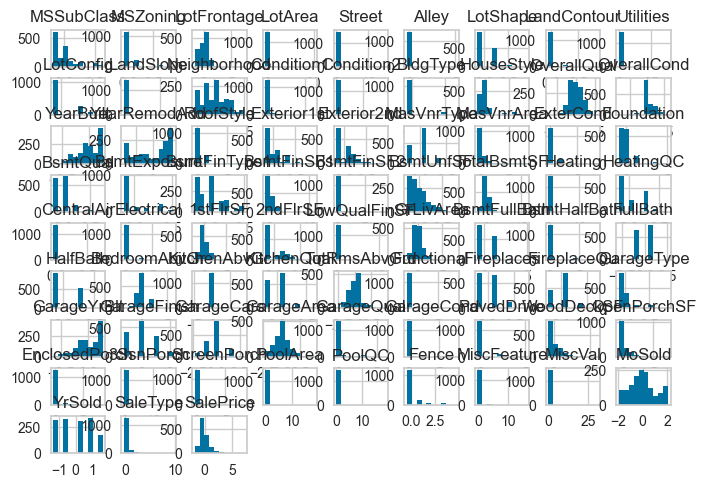

In [143]:

df2.groupby('SalePrice').size()
df2.hist()
plt.show()

Para llevar a cabo clustering se obtuvieron dos variables X y Y.

X contiene las características (todas las columnas después de eliminar filas con valores nulos) y Y contiene la variable de destino 'SalePrice'. La forma de X te proporciona información sobre la estructura de los datos.

In [144]:
X = np.array(df2.dropna())
Y = np.array(df2['SalePrice'])
X.shape

(1371, 75)

Luego se utiliza una semilla aleatoria, se hace un escalamiento del conjunto de datos y luego se calcula el índice de Hopkins para evaluar la tendencia del conjunto de datos.

In [145]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

pyclustertend.hopkins(X,len(X))

0.12267671871962382

El índice de Hopkins obtenido es **0.12253843344834266**. Este valor indica que hay una tendencia moderada a la agrupacion de datos.

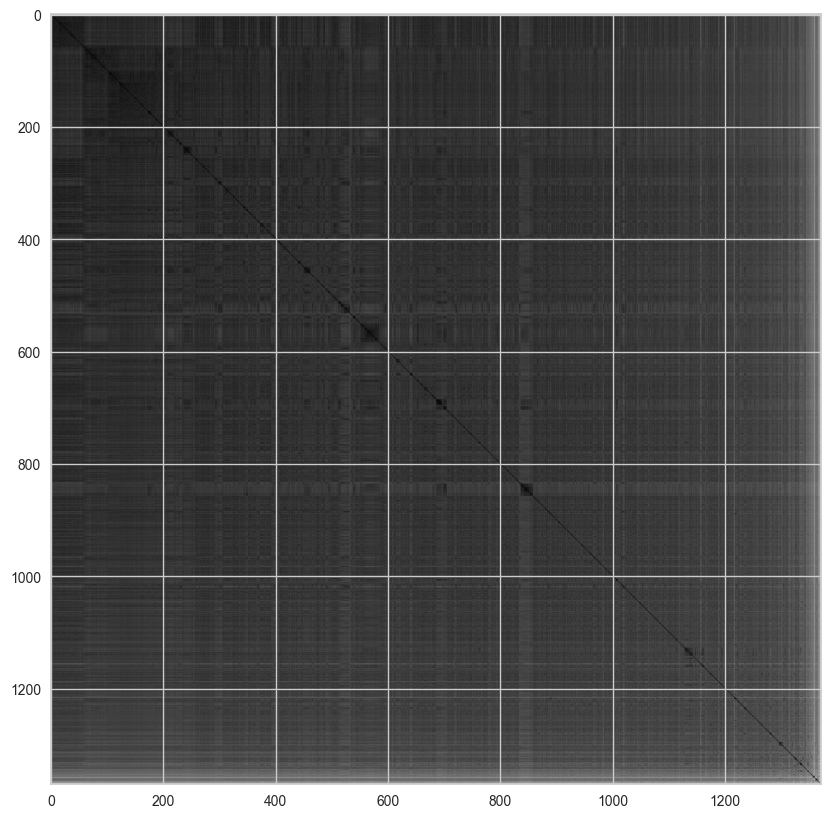

In [146]:
pyclustertend.vat(X_scale)

La visualización generada por el método VAT nos indica la presencia de 9 posibles grupos para realizar en el proceso de clustering.

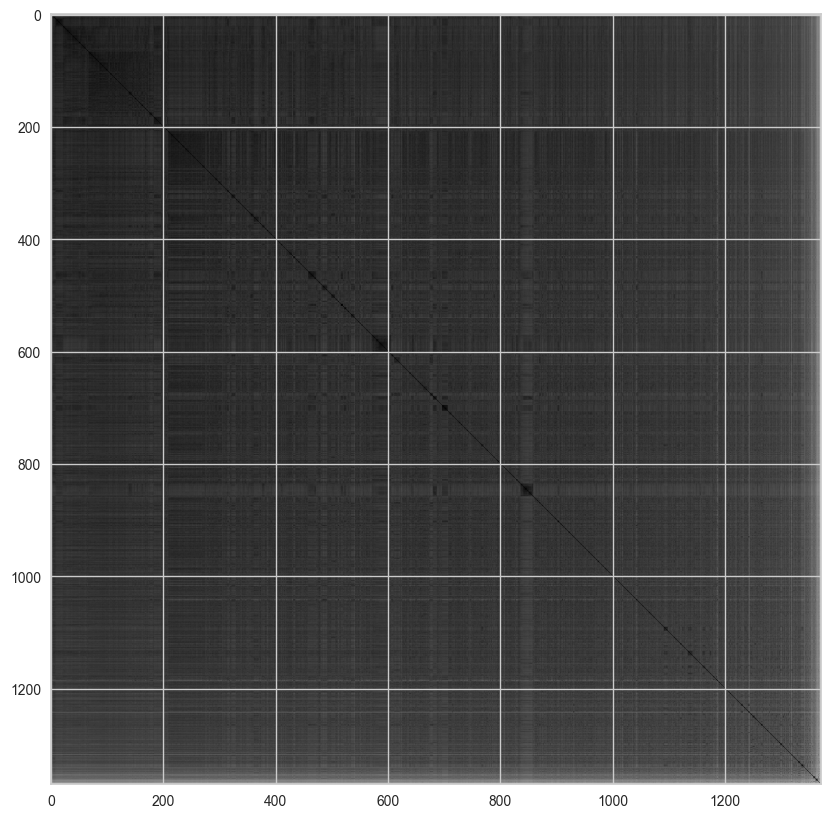

In [147]:
pyclustertend.vat(X)

*Para realizar clustering se importan las librerías requeridas*

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from kmodes.kprototypes import KPrototypes

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator

from sklearn.decomposition import PCA


from tqdm import tqdm
import sys
import warnings

De esta manera, se procede a calcular la generación de gráficos de codo para el algoritmo KMeans utilizando métricas de distorsión, silueta y calinski_harabasz.

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 10  | elbow score: 73,551.008


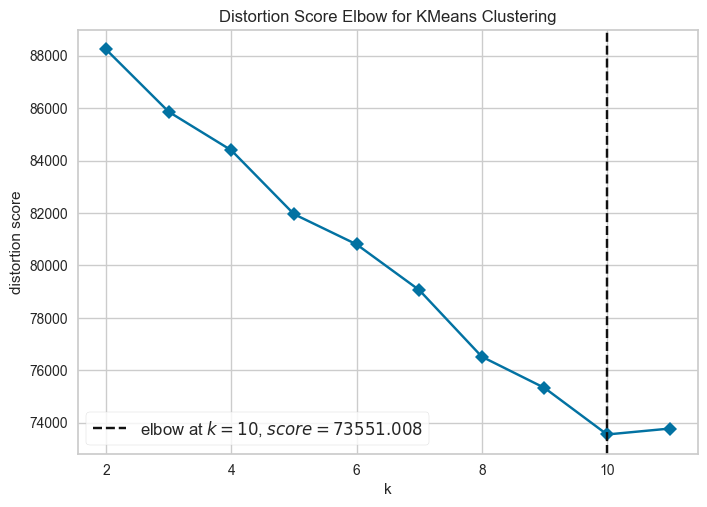

 33%|███▎      | 1/3 [00:00<00:00,  2.71it/s]

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.099


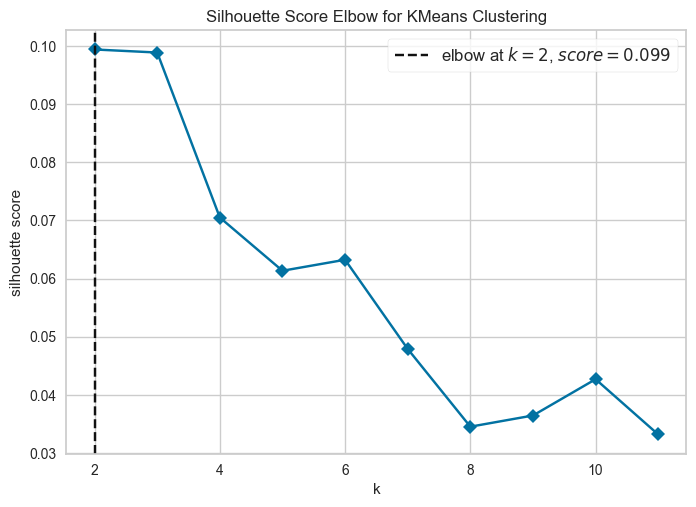

 67%|██████▋   | 2/3 [00:00<00:00,  2.06it/s]

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 2  | elbow score: 138.792


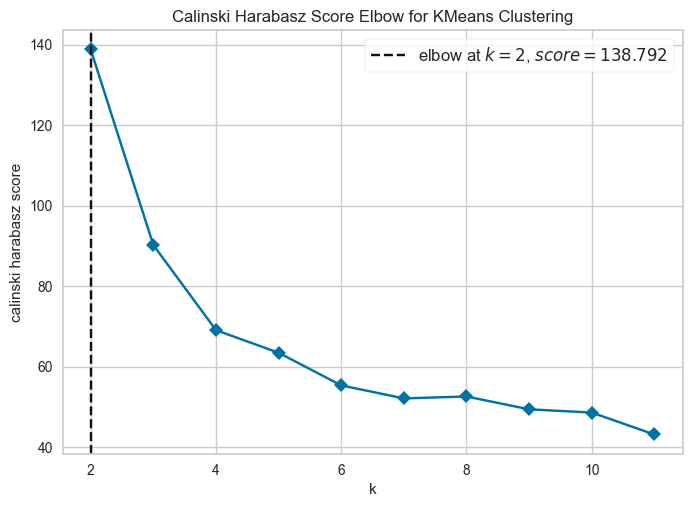

100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


In [149]:
# get it from https://towardsdatascience.com/elbows-and-silhouettes-hands-on-customer-segmentation-in-python-66c2e794c552
warnings.filterwarnings("ignore")
# elbow score plot with Yellowbrick
nK = 12    
RNDN = 42    
def elbowplot(df2, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df2)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  
    
    
    
# call elbow plot for each of 3 alternative metrics
    # distortion = mean sum of squared distances to center
    # silhouette = mean ratio of intra-cluster and nearest-cluster distance
    # calinski = ratio of within to between cluster dispersion

model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

De los resultados obtenidos se puede identificar que la cantidad de clusteres óptimos de acuerdo con las **métrica de distorsión** son **10**, de acuerdo a **las siluetas** son **2**  y con la métrica de **calinski_harabasz** son **2**. De esta manera se decide realizar el clustering con una cantidad de **2**.

In [150]:
km = cluster.KMeans(n_clusters=2).fit(X)
print (km)

KMeans(n_clusters=2)


 Para realizar clustering se calculan los centroides de los clústeres y se muestran después de realizar el ajuste de un modelo de KMeans.

In [151]:
centroides = km.cluster_centers_
print(centroides)

[[ 0.06811975  0.01301032  0.08058844  0.13586978 -0.01461504 -0.04675808
   0.31310436  0.03220294 -0.02618016  0.06468179 -0.01878015 -0.16896081
  -0.02449393 -0.00668482  0.1025039  -0.34405463  0.79384608 -0.33455752
   0.85137559  0.7256934  -0.04079015 -0.34653714 -0.43435343 -0.06859546
   0.35327045 -0.20067824 -0.68549117 -0.38524772  0.13860648 -0.51150256
   0.21109616 -0.12342049  0.3078672   0.48416735 -0.12236844 -0.62805572
  -0.26381257 -0.29277018  0.40833555  0.30207746 -0.08076037  0.54387587
   0.14392289 -0.10139869  0.73497886  0.33402139  0.04504759 -0.16821517
  -0.42922385  0.37296139 -0.15661116  0.2975398  -0.06859546 -0.30330909
   0.78591591 -0.04165661  0.67930359  0.6030001  -0.26526662 -0.27561442
  -0.2727247   0.29413495  0.35749101 -0.25706955  0.04630512 -0.01954724
  -0.00727619 -0.00472213 -0.25762156 -0.05928938 -0.03126286  0.02536663
  -0.04653759  0.05129943  0.73855333]
 [-0.09401516 -0.05114539 -0.06016392 -0.08400981 -0.0009536   0.0217851


Se asigna cada punto de datos al clúster más cercano y se almacenan estas asignaciones en la variable **sales**.

In [152]:
sales = km.predict(X)

El tamaño de la muestra al calcular el índice de Hopkins es:

In [153]:
len(X)

1371

Y las columnas de la muestra que se utilizan son:

In [154]:
print(len(df2.columns))
df2.columns

75


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

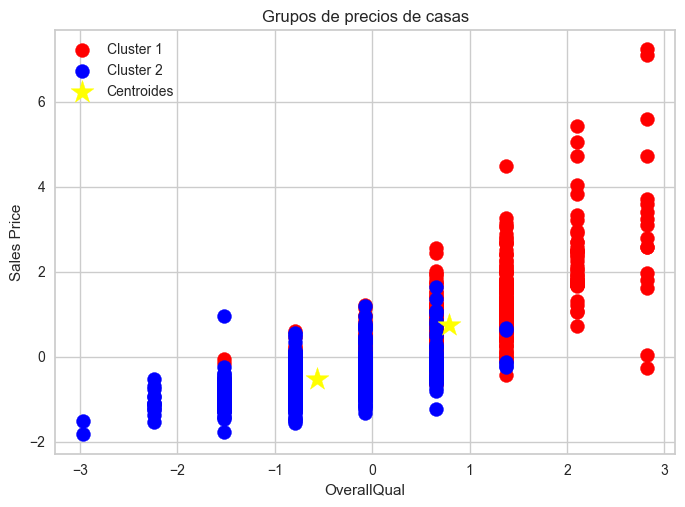

In [155]:
plt.scatter(X[sales == 0, 16], X[sales == 0, 74],s=100,c='red', label = "Cluster 1")
plt.scatter(X[sales == 1, 16], X[sales == 1, 74],s=100,c='blue', label = "Cluster 2")
plt.scatter(km.cluster_centers_[:,16],km.cluster_centers_[:,74], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de precios de casas")
plt.xlabel("OverallQual")
plt.ylabel("Sales Price")
plt.legend()

Al realizar el agrupamiento se determinó utilizar la columna OverallQual debido a que en el mapa de calor de correlación de variables se identificó que existe una alta correlación entre estas variables. Al observar el resultado del clustering, se identificaron 2 grupos principales de los que se puede determinar que a medida que la valoración crece, el precio de la casa aumenta en ambos casos. Las casas con mayor valoración tienen precios más altos y las que tienen una menor valoración, precios más bajos. 

In [156]:
dataframe.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Regresión lineal
Posteriormente para hacer la predicción de la variable **salePrice** se decidió realizar el método de regresión lineal. Tomando en cuenta esto, primero se procedió a realizar la preparación de los datos separando la variable de respuesta del dataset.

In [157]:
y = df2.pop('SalePrice')
X = df2

In [158]:
ds = list(df2.columns)
ds

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 

Se realizó la separación entre el conjunto de datos prueba y de test de la siguiente manera:
- Test: 30%
- Train: 70%

In [159]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

Se realiza el ajuste de regresión lineal simple utilizando la variable 'OverallQual' como predictor para predecir la variable objetivo (**salePrice**) además, se normalizan por separado los datos (de train y de test) para que todos tengan una escala similar.

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

p_length = y_train.values.reshape(-1, 1)
p_length_t = y_test.values.reshape(-1, 1)

overall_qual_index = X_train.columns.get_loc('OverallQual')

p_width = X_train_scaled[:, overall_qual_index].reshape(-1, 1)
p_width_t = X_test_scaled[:, overall_qual_index].reshape(-1, 1)

lm = LinearRegression()
lm.fit(p_width, p_length)

p_length_pred = lm.predict(p_width_t)

Para representar la ecuación se extraen los coeficientes y el intercepto del modelo y crea una cadena de texto que representa la ecuación de la recta de regresión.

In [161]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'$p_length = %0.4f*p_width %+0.4f$'%(m,c)
print(label)

$p_length = 0.8272*p_width +0.0321$


Finalmente se representa gráficamente el modelo de regresión lineal simple calculado.

Text(0.5, 1.0, 'Test Set OverallQual vs SalePrice')

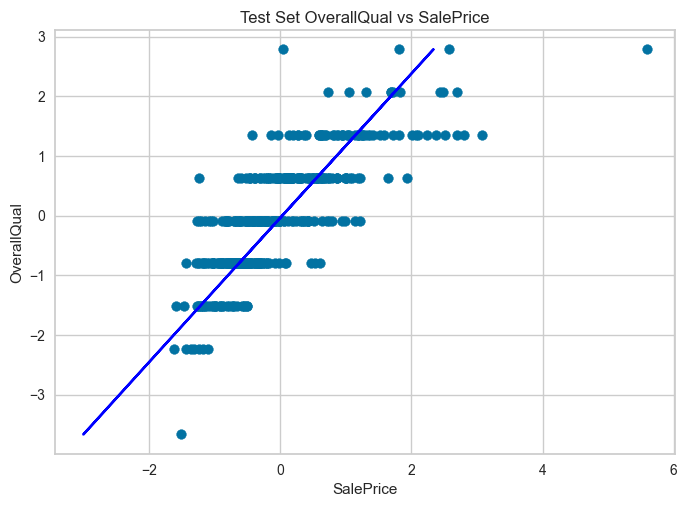

In [162]:
fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("OverallQual")
plt.title("Test Set OverallQual vs SalePrice")

In [163]:
print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

Mean Squared Error: 0.31
R squared: 0.60


El $R^2$ explica el 67% de la variabilidad de los datos. Se debe mencionar que dentro de las pruebas realizadas en relación a las correlaciones obtenidas por el mapa de calor, es la variable que permitió obtener el mejor porcentaje. 

De esta manera, se procede a analizar los residuales encontrados.

In [164]:
residuales = p_length_t - p_length_pred
print("Residuales ",len(residuales))

Residuales  438


El valor positivo obtenido indica que en promedio, las predicciones son mayores que los valores reales por 438.

Text(0, 0.5, 'Residuales')

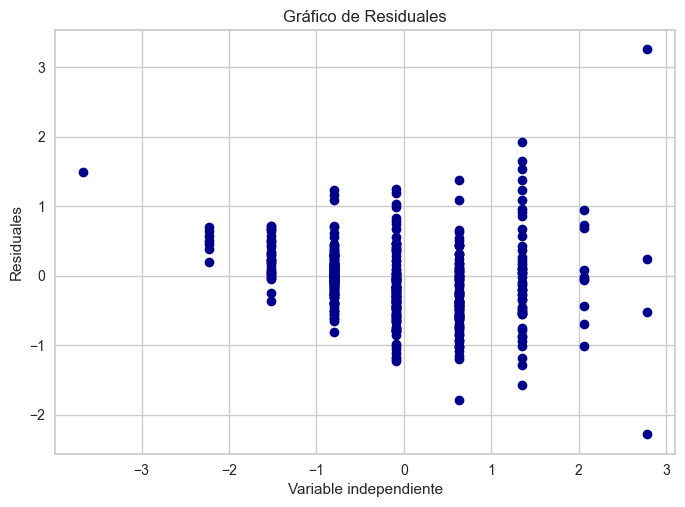

In [165]:
plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

De acuerdo con el gráfico de residuales se puede observar que los residuos parecen oscilares entre valores de -2 a 3 y estos parecen llegar a tomar una forma cuadrática por lo que indicaría que los residuos no necesariamente tienen una relación lineal. 

Text(0.5, 1.0, 'Residuales')

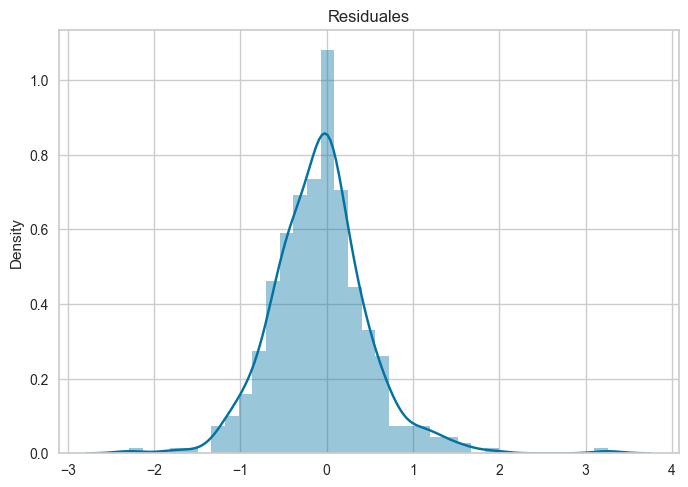

In [166]:
sns.distplot(residuales)
plt.title("Residuales")

De acuerdo con la gráfica los valores residuales siguen una distribución normal entre los rangos de -2 a 2 por lo que para ese grupo concreto podrían indicar una buena aproximación de los datos. 

{'whiskers': [<matplotlib.lines.Line2D at 0x2570528ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x25768e9d210>,
 'boxes': [<matplotlib.lines.Line2D at 0x25705a3d9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25768e9f950>],
 'fliers': [<matplotlib.lines.Line2D at 0x25768e9e590>],
 'means': []}

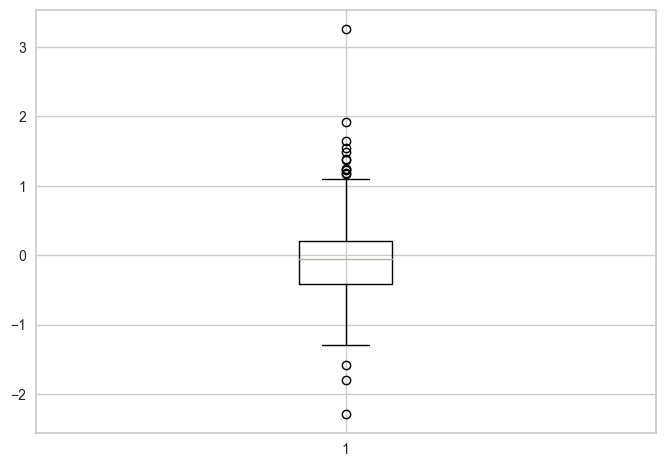

In [167]:
plt.boxplot(residuales)

El diagrama de caja y bigotes nos indica que los datos son simetricos de -1 a 1 y existen muchos valores atípicos de 1 a 3.

In [168]:
print(normaltest(residuales))

NormaltestResult(statistic=array([68.11845675]), pvalue=array([1.61534413e-15]))


Se realizó una prueba de normalidad para evalúar la hipótesis nula de la muestra. Debido a que el estadístico es de 82.82944419 (grande) y el valor de p 1.03232091e-18 (es muy pequeño) existe suficiente evidencia para rechazar la hipótesis nula (indicando que los datos no provienen necesariamente de una distribución normal).

0.6020779463518554

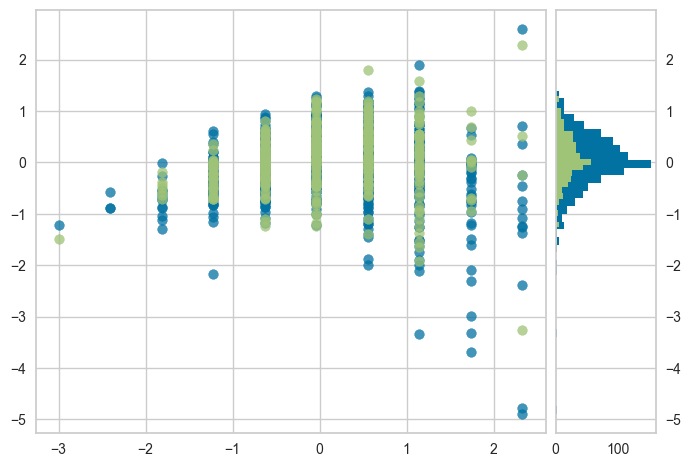

In [169]:

model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)


El gráfico parece indicar que existe cierta heterocedasticidad por la existencia de la forma cónica. De esta manera se interpreta que la varianza de los errores no es constante y puede cambiar a lo largo de las predicciones del modelo.  

In [170]:
est = sm.OLS(p_length,p_width)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                              1727.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                   1.13e-221
Time:                        20:15:36   Log-Likelihood:                         -986.11
No. Observations:                1021   AIC:                                      1974.
Df Residuals:                    1020   BIC:                                      1979.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

De acuerdo al resumen, el modelo tiene un $R^2$ relativamente bajo sugiriendo que este no explica completamente la variabilidad de los datos. De esta manera, se rechaza la hipósis nula de que OverallQual no es una buena variable predictoria del precio de ventas de las casas. 

### Regresion Lineal Multivariable

Se verifica entre todas las variables si existen valores NaN para evitar errores en la regresión

In [171]:
# Verificar qué columnas contienen valores NaN
columns_with_nan = df2.columns[df2.isna().any()].tolist()
print("Columnas con valores NaN:", columns_with_nan)


Columnas con valores NaN: ['MasVnrArea', 'GarageYrBlt']


Podemos ver que hay dos campos que cuentas con valores NaN, por lo que se procede a rellenar con la media, los campos NaN en Garage Built Year, y con 0 los campos en Masonry veneer area.

In [172]:
df_filled = df2.copy()

# Calcular la media de GarageYrBlt
garage_year_mean = df_filled['GarageYrBlt'].mean()

# Llenar NaN en GarageYrBlt con la media
df_filled['GarageYrBlt'].fillna(garage_year_mean, inplace=True)

# Llenar NaN en MasVnrArea con 0
df_filled['MasVnrArea'].fillna(0, inplace=True)

Ya con esos valores sustituidos, podemos realizar la primera gráfica de valores reales vs predicciones con todas las variables cuantitativas

Text(0, 0.5, 'Predicciones')

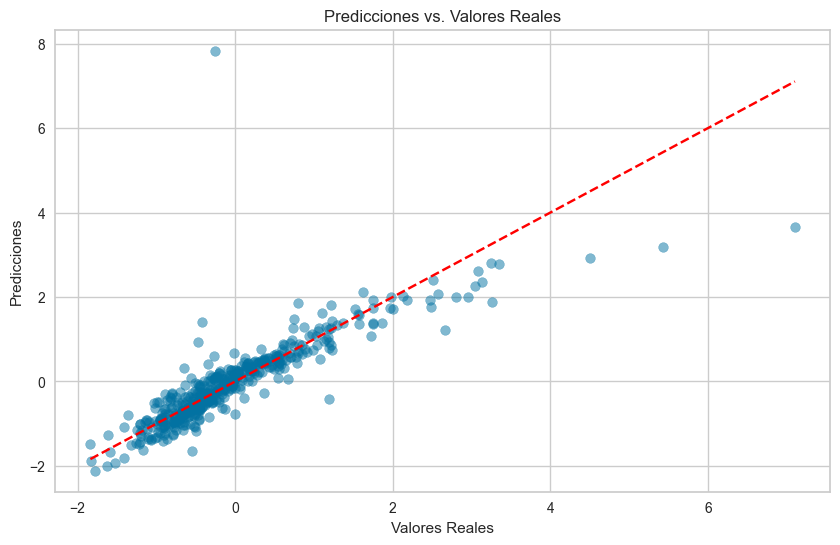

In [214]:
X = df_filled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

y_pred = lm.predict(X_test_scaled)

# Graficar las predicciones versus los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

In [215]:
# Análisis del modelo
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("R squared: %.2f" % r2_score(y_test, y_pred))

Mean Squared Error: 0.30
R squared: 0.71


In [216]:
# Residuales
residuales = y_test - y_pred
print("Residuales:", len(residuales))



Residuales: 438


Text(0, 0.5, 'Residuales')

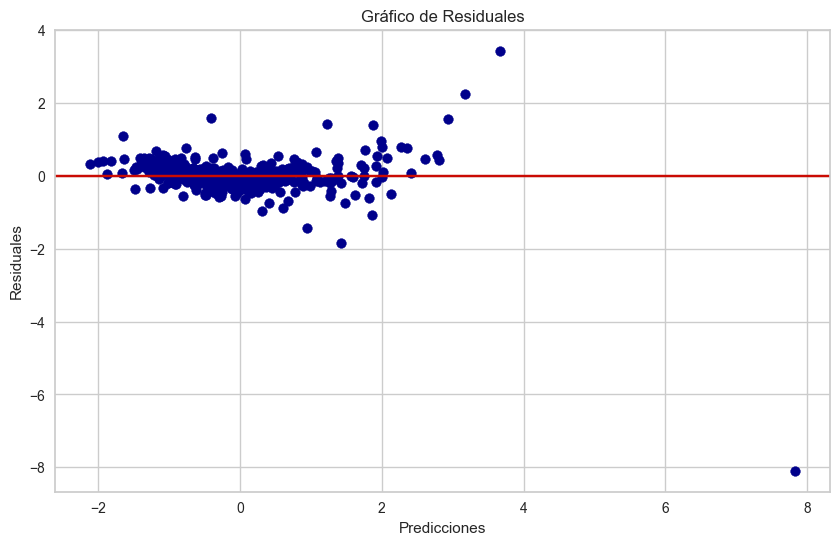

In [217]:
# Gráfico de Residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuales, color='darkblue')
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Gráfico de Residuales")
plt.xlabel("Predicciones")
plt.ylabel("Residuales")

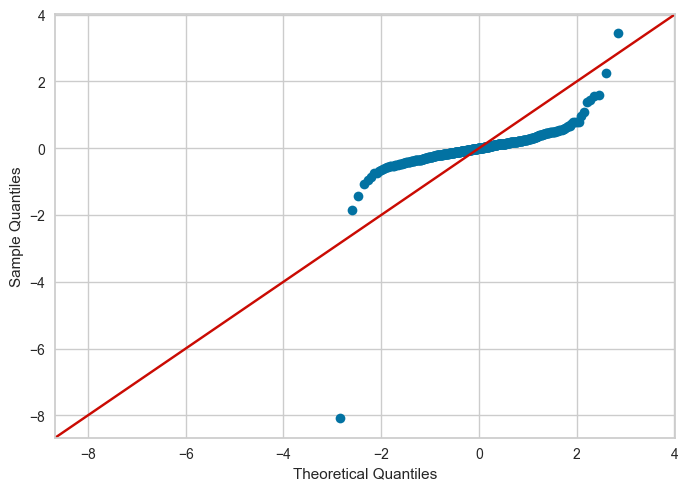

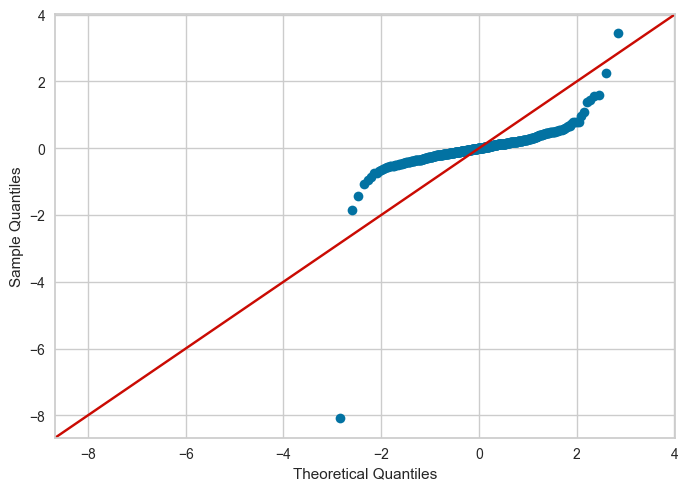

In [238]:
sm.qqplot(residuales,line='45')

In [220]:
k,p=sm.stats.diagnostic.lilliefors(residuales)
print("p =",p)

p = 0.0009999999999998899


El p-valor es menor que 0.05 por lo que se rechaza la hipótesis nula de normalidad de los datos.

Text(0.5, 1.0, 'Distribución de Residuales')

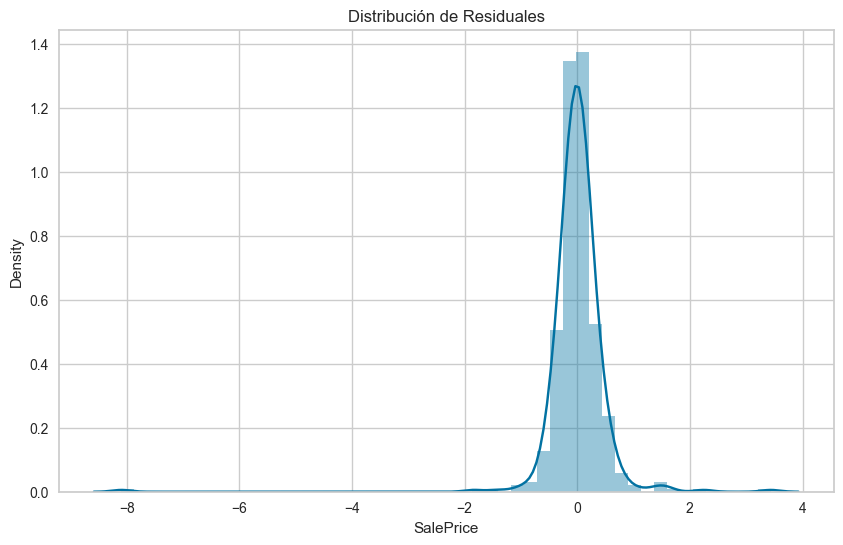

In [221]:
# Distribución de Residuales
plt.figure(figsize=(10, 6))
sns.distplot(residuales)
plt.title("Distribución de Residuales")

Podemos ver que los valores residuales siguen una distribución normal entre los rangos de -1 a 1.

Text(0, 0.5, 'Residuales')

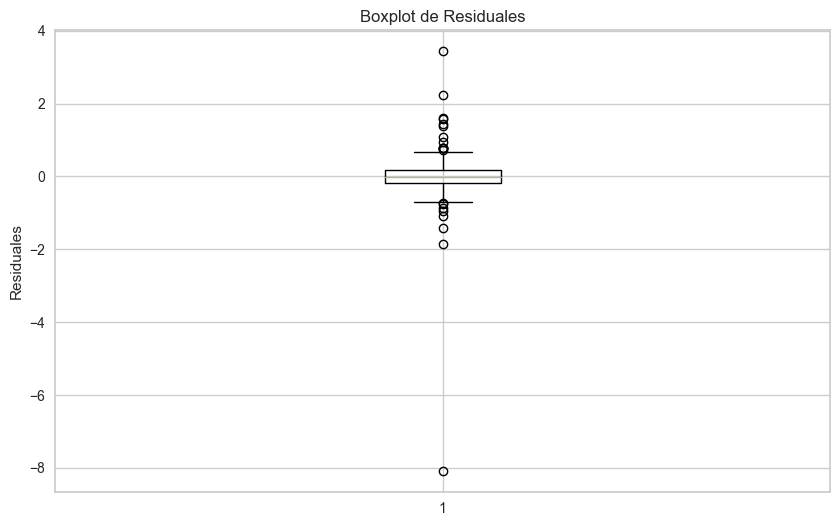

In [222]:
# Boxplot de Residuales
plt.figure(figsize=(10, 6))
plt.boxplot(residuales)
plt.title("Boxplot de Residuales")
plt.ylabel("Residuales")

El diagrama de caja y bigotes nos indica que los datos son simetricos entre un poco despué de -1 hasta hasta un poco antes 1. Y hay valores atípicos arriba de uno, y abajo de -1.

In [223]:
print(normaltest(residuales))

NormaltestResult(statistic=601.8851229711055, pvalue=2.0058856755556554e-131)


In [224]:
# Resumen del modelo
X_train_sm = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              95.01
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        20:24:10   Log-Likelihood:                         -374.23
No. Observations:                1021   AIC:                                      890.5
Df Residuals:                     950   BIC:                                      1240.
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

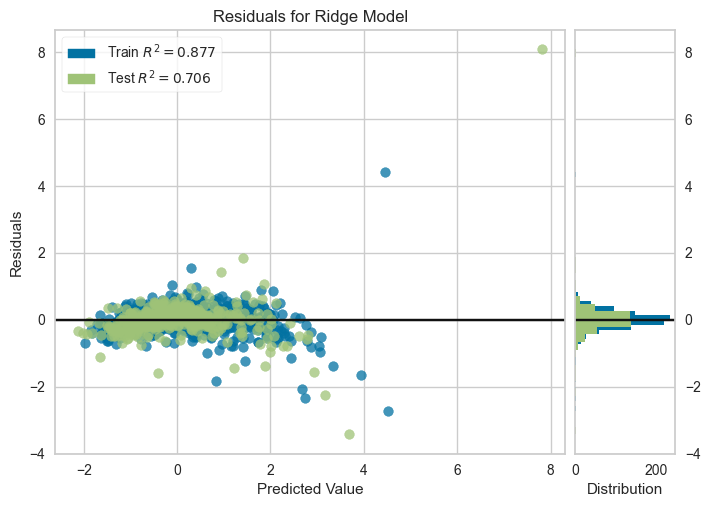

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [225]:
# Gráfico del modelo
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

### Multicolinealidad

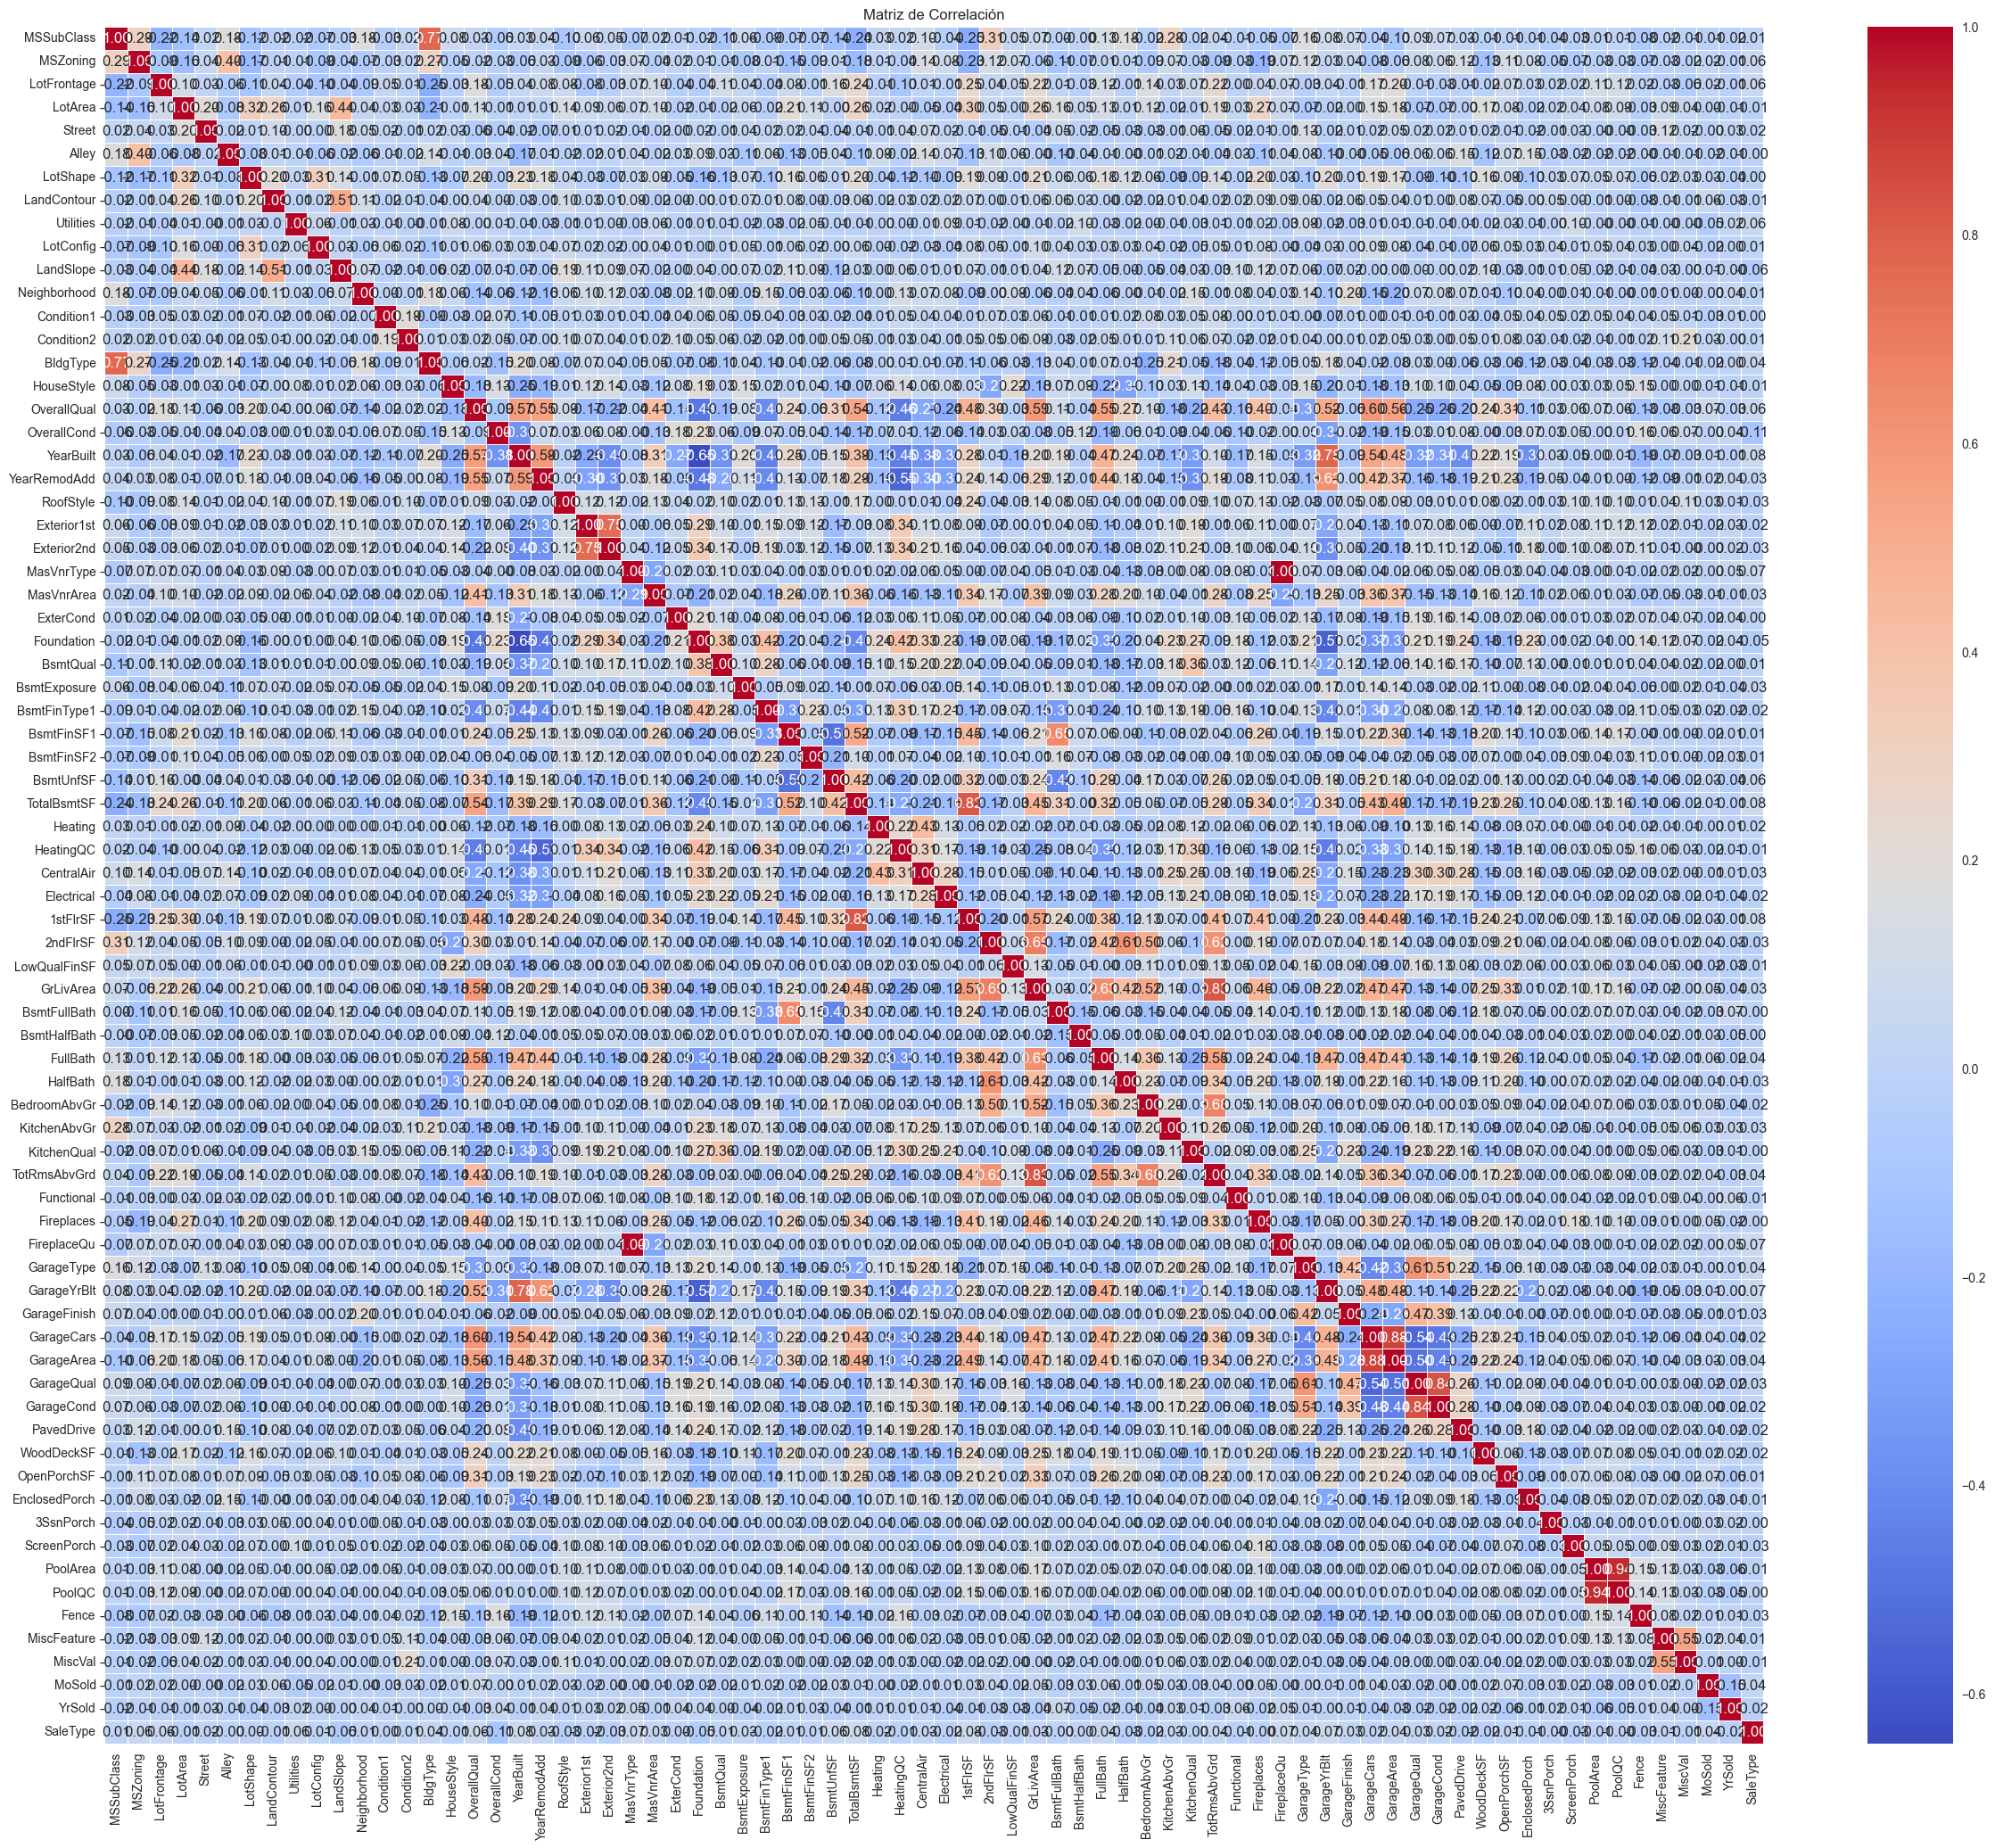

Correlación entre 'MasVnrType' y 'FireplaceQu': 1.0
Correlación entre 'TotalBsmtSF' y '1stFlrSF': 0.8195299750050321
Correlación entre 'GrLivArea' y 'TotRmsAbvGrd': 0.8254893743088426
Correlación entre 'GarageCars' y 'GarageArea': 0.8824754142814624
Correlación entre 'GarageQual' y 'GarageCond': 0.8383959090159349
Correlación entre 'PoolArea' y 'PoolQC': 0.9384016221034014


In [226]:
# Calcular la matriz de correlación
correlation_matrix = df_filled.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Definir un umbral de correlación
threshold = 0.8  # Por ejemplo, consideraremos como alta correlación valores absolutos mayores de 0.8

# Crear una función para imprimir pares de características con correlación alta
def print_high_correlation(correlation_matrix, threshold):
    n_features = correlation_matrix.shape[0]
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                print(f"Correlación entre '{correlation_matrix.index[i]}' y '{correlation_matrix.columns[j]}': {correlation_matrix.iloc[i, j]}")

# Llamar a la función con la matriz de correlación y el umbral definido
print_high_correlation(correlation_matrix, threshold)

En la matriz de correlación podemos ver que tenemos bastantes variables con alta correlacion, representadas con color rojo. Las variables más relacionadas entre si son 'MasVnrType' y 'FireplaceQu' con una correlación de 1.0, perfecta basicamente, y también 'PoolArea' y 'PoolQC' con una correlación de 0.94., la cual es bastante alta. Por ello se podria decir que si puede llegar a existir multicolinealidad en el modelo.

En cuanto a la adaptación del modelo a los datos, la alta correlación entre algunas características puede afectar la estabilidad del modelo de regresión lineal. Esto se debe a que la multicolinealidad puede inflar los errores estándar de los coeficientes y hacer que la interpretación de los mismos sea menos confiableAcá logramos obtener las correlaciones mayores a 0.5 entre la variable respuesta con el resto de variables. Podemos notar que no tienen alta correlación por lo que no hay multicolinealidad

### Sobreajuste

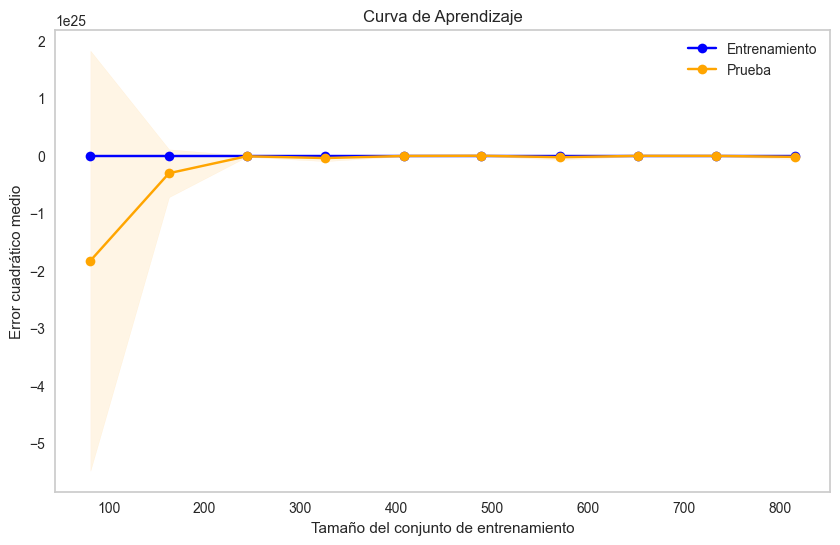

R-cuadrado en los datos de prueba: 0.7056899049039882
MSE en los datos de prueba: 0.30349163529522494
R-cuadrado en los datos de entrenamiento: 0.8766484117440727
MSE en los datos de entrenamiento: 0.12176112556453493


In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="orange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Prueba")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Error cuadrático medio")
    plt.title("Curva de Aprendizaje")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Utiliza la función plot_learning_curve con tu modelo y datos
plot_learning_curve(lm, X_train_scaled, y_train)

# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_score = lm.score(X_train_scaled, y_train)
test_score = lm.score(X_test_scaled, y_test)
train_mse = mean_squared_error(y_train, lm.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lm.predict(X_test_scaled))

print("R-cuadrado en los datos de prueba:", test_score)
print("MSE en los datos de prueba:", test_mse)
print("R-cuadrado en los datos de entrenamiento:", train_score)
print("MSE en los datos de entrenamiento:", train_mse)


Para el sobreajuste podemos notar que el error tanto en los datos de prueba como de entrenamiento son relativamente bajos (Entrenamiento: 0.13, Prueba: 0.19). En la gráfica podemos notar que el error en un par de tamaños de conjuntos de datos crece, pero ya conforme este tamaño va aumentando el error va disminuyendo entre ambos. Por lo que se puede concluir que no esta sobreajustado.

In [233]:
x_pred_modelo1 = lm.predict(X_train_scaled)
mse_modelo1_train = mean_squared_error(y_train, x_pred_modelo1) 

print("MES_train: ",round(mse_modelo1_train,4))
print('MSE_test: ', round(test_mse,4))

MES_train:  0.1218
MSE_test:  0.3035


## Selección de predictores. Stepwise

In [234]:
# Crea un modelo de seleccion de predicrores stepwise backward, con un k-fold de 5 en la validación cruzada
from sklearn.feature_selection import SequentialFeatureSelector


seleccionPredictores = SequentialFeatureSelector(lm, direction='backward', cv=5)
seleccionPredictores.fit(X_train, y_train)

# Extrae los índices de los predictores
indicePredictores= seleccionPredictores.get_support(indices=True)



# Variables seleccionadas
columnas = X_train.columns

print("Predictores:   ")

for i in indicePredictores:
    print(columnas[i])

Predictores:   
LotFrontage
LotArea
LotShape
Condition1
BldgType
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
MasVnrType
MasVnrArea
Foundation
BsmtQual
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
GrLivArea
BsmtFullBath
BedroomAbvGr
KitchenAbvGr
Functional
Fireplaces
FireplaceQu
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
ScreenPorch
PoolArea
Fence
YrSold
SaleType


In [246]:
X_train_stw= X_train.iloc[:,indicePredictores]
X_test_stw = X_test.iloc[:,indicePredictores]

In [236]:
# Train a linear regression model on the training set with the selected features
modelo2 = LinearRegression()
modelo2.fit(X_train_stw, y_train)

# Predict the target values on the testing set
y_pred_modelo2 = modelo2.predict(X_test_stw)

Text(0, 0.5, 'Residuales')

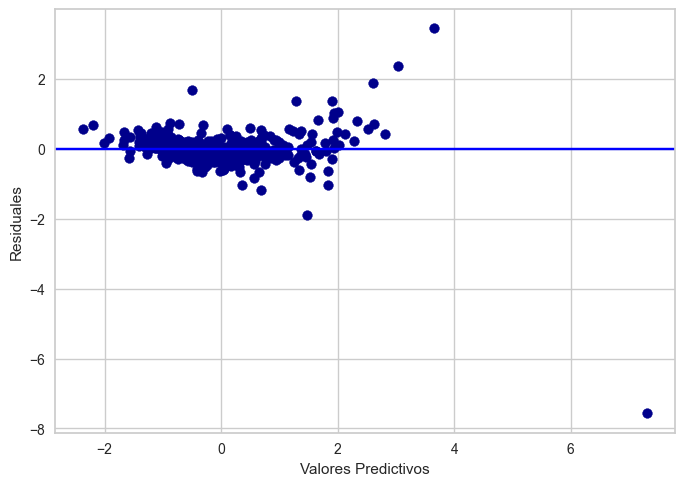

In [240]:
resid_modelo2=y_test-y_pred_modelo2
plt.scatter(y_pred_modelo2, resid_modelo2, color='darkblue')
plt.axhline(0,color='blue')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

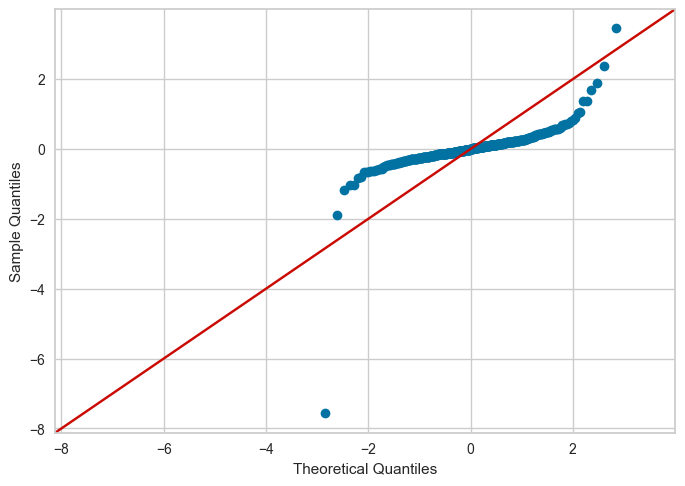

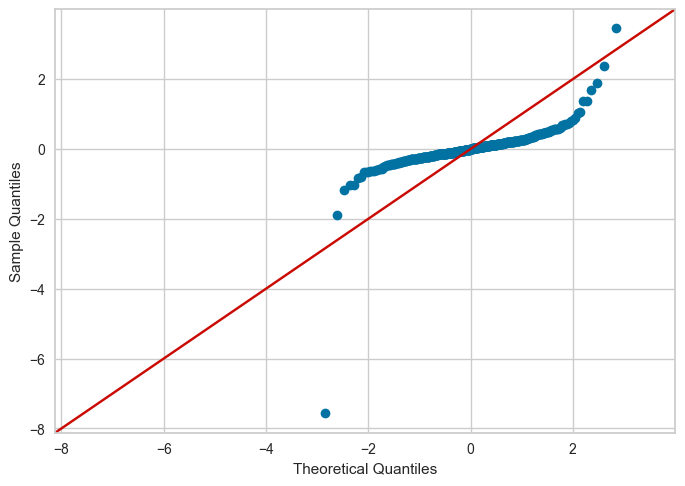

In [241]:
sm.qqplot(resid_modelo2,line='45')

In [242]:
k,p=sm.stats.diagnostic.lilliefors(resid_modelo2)
print("p =",p)

p = 0.0009999999999998899


In [253]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_score = modelo2.score(X_train_stw, y_train)
test_score = modelo2.score(X_test_stw, y_test)
train_mse = mean_squared_error(y_train, modelo2.predict(X_train_stw))
test_mse = mean_squared_error(y_test, modelo2.predict(X_test_stw))

print("R-cuadrado en los datos de prueba:", test_score)
print("MSE en los datos de prueba:", test_mse)
print("R-cuadrado en los datos de entrenamiento:", train_score)
print("MSE en los datos de entrenamiento:", train_mse)

R-cuadrado en los datos de prueba: 0.7201688551540681
MSE en los datos de prueba: 0.2885609877844033
R-cuadrado en los datos de entrenamiento: 0.8659052264427498
MSE en los datos de entrenamiento: 0.13236579108147517


In [252]:
x_pred_modelo2 = modelo2.predict(X_train_stw)
mse_modelo2_train=metrics.mean_squared_error(y_train, x_pred_modelo2) 

print("MES_train: ",round(mse_modelo2_train,4))
print('MSE_test: ', round(test_mse,4))

MES_train:  0.1324
MSE_test:  0.2886


### Ridge

In [254]:
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import cross_validate


alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))


cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, X_train, y_train,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
train_error = -cv_results["train_score"]
print(f"Error medio cuadrado de la regresión con datos de entrenamiento:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

test_error = -cv_results["test_score"]
print(f"Error medio cuadrado de la regresion con los datos de prueba:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")
mse_alphas = [est[-1].cv_values_.mean(axis=0)
            for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

Error medio cuadrado de la regresión con datos de entrenamiento:
0.109 ± 0.017
Error medio cuadrado de la regresion con los datos de prueba:
0.271 ± 0.181


0.010000  0.012743  0.016238  0.020691  0.026367  0.033598  0.042813  \
0  0.107959  0.107959  0.107959  0.107958  0.107958  0.107957  0.107957   
1  0.109591  0.109591  0.109591  0.109591  0.109590  0.109589  0.109589   
2  0.182619  0.182617  0.182615  0.182613  0.182609  0.182605  0.182599   
3  0.179192  0.179191  0.179189  0.179186  0.179183  0.179179  0.179174   
4  0.169760  0.169759  0.169757  0.169755  0.169752  0.169748  0.169744   

   0.054556  0.069519  0.088587  0.112884  0.143845  0.183298  0.233572  \
0  0.107956  0.107954  0.107953  0.107951  0.107949  0.107946  0.107942   
1  0.109588  0.109586  0.109585  0.109583  0.109580  0.109577  0.109573   
2  0.182592  0.182583  0.182572  0.182557  0.182539  0.182515  0.182485   
3  0.179168  0.179160  0.179149  0.179136  0.179119  0.179097  0.179070   
4  0.169738  0.169731  0.169721  0.169709  0.169694  0.169674  0.169649   

   0.297635  0.379269  0.483293  0.615848  0.784760  1.000000  
0  0.107937  0.107930  0.107922  0.107912  0.107899  0.107883  
1  0.109568  0.109561  0.109553  0.109542  0.109529  0.109512  
2  0.182447  0.182398  0.182337  0.182259  0.182160  0.182035  
3  0.179035  0.178991  0.178935  0.178863  0.178774  0.178660  
4  0.169618  0.169578  0.169527  0.169462  0.169381  0.169277

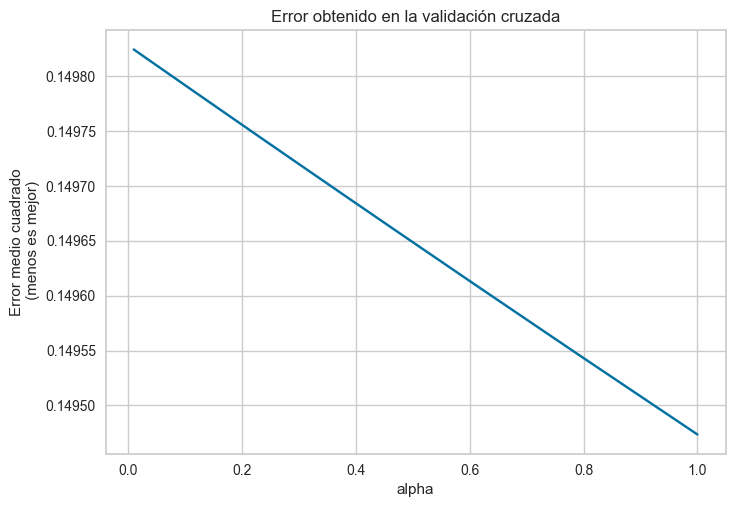

In [255]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Error medio cuadrado\n (menos es mejor)")
plt.xlabel("alpha")
_ = plt.title("Error obtenido en la validación cruzada")

In [257]:
mejores_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
mejores_alphas
print(f"El mejor alfa es:\n"
      f"{np.mean(mejores_alphas):.2f} ± {np.std(mejores_alphas):.2f}")

El mejor alfa es:
1.00 ± 0.00


In [258]:
alfa_modelo3 = np.mean(mejores_alphas)
modelo3 = Ridge(alpha=alfa_modelo3)
modelo3.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred_modelo3 = modelo3.predict(X_test)

In [268]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_score = modelo3.score(X_train, y_train)
test_score = modelo3.score(X_test, y_test)
train_mse = mean_squared_error(y_train, modelo3.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred_modelo3)

print("R-cuadrado en los datos de prueba:", test_score)
print("MSE en los datos de prueba:", test_mse)
print("R-cuadrado en los datos de entrenamiento:", train_score)
print("MSE en los datos de entrenamiento:", train_mse)

R-cuadrado en los datos de prueba: 0.7079709873390392
MSE en los datos de prueba: 0.30113939033321985
R-cuadrado en los datos de entrenamiento: 0.8766552311583442
MSE en los datos de entrenamiento: 0.12175439407798397


In [277]:
# calculate aic for regression 
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic

In [278]:
# Regression metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_log_error


explained_variance_modelo3=explained_variance_score(y_test, y_pred_modelo3)
mean_absolute_error_modelo3= mean_absolute_error(y_test, y_pred_modelo3) 
mse_modelo3=metrics.mean_squared_error(y_test, y_pred_modelo3) 
mean_squared_log_error_modelo3=mean_squared_log_error(y_test, y_pred_modelo3)
r2_modelo3=metrics.r2_score(y_test, y_pred_modelo3)
k = modelo3.coef_.size
n = X_train.shape[0]
aic_modelo3 = calculate_aic(n,mse_modelo3,k)
bic_modelo3 = calculate_bic(n,mse_modelo3,k)

print('explained_variance: ', round(explained_variance_modelo3,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo3,4))
print('r2: ', round(r2_modelo3,4))
print('MAE: ', round(mean_absolute_error_modelo3,4))
print('MSE: ', round(mse_modelo3,4))
print('RMSE: ', round(np.sqrt(mse_modelo3),4))
print('AIC: ',round(aic_modelo3,4))
print('BIC: ',round(bic_modelo3,4))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [270]:
from sklearn.linear_model import LassoCV


lasso = make_pipeline(StandardScaler(), LassoCV(alphas = np.arange(0,1,0.02), cv=cv, n_jobs = 2))
cv_results_lasso = cross_validate(lasso, X_train, y_train,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
train_error = -cv_results_lasso["train_score"]
print(f"Error medio cuadrado de la regresión con datos de entrenamiento:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

test_error_lasso = -cv_results_lasso["test_score"]
print(f"Error medio cuadrado de la regresion con los datos de prueba:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")
alphas = []
for est in cv_results_lasso["estimator"]:
    alphas.append(est[1].alpha_)
print
print(alphas)
-cv_results_lasso["test_score"]

Error medio cuadrado de la regresión con datos de entrenamiento:
0.124 ± 0.018
Error medio cuadrado de la regresion con los datos de prueba:
0.271 ± 0.181
[0.02, 0.02, 0.02, 0.02, 0.02]


array([0.48496719, 0.47187567, 0.10178742, 0.10421015, 0.17133008])

In [272]:
from sklearn.linear_model import Lasso


modelo4 = Lasso(alpha=0.02)
modelo4.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred_modelo4 = modelo4.predict(X_test)

In [276]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_score = modelo4.score(X_train, y_train)
test_score = modelo4.score(X_test, y_test)
train_mse = mean_squared_error(y_train, modelo4.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred_modelo4)

print("R-cuadrado en los datos de prueba:", test_score)
print("MSE en los datos de prueba:", test_mse)
print("R-cuadrado en los datos de entrenamiento:", train_score)
print("MSE en los datos de entrenamiento:", train_mse)

R-cuadrado en los datos de prueba: 0.7265745850466552
MSE en los datos de prueba: 0.28195541946461267
R-cuadrado en los datos de entrenamiento: 0.8612262471991912
MSE en los datos de entrenamiento: 0.13698444080657451
